In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

import folium
from folium import Choropleth

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

from sklearn.ensemble import RandomForestRegressor

In [208]:
pd.set_option('display.max_columns', None)

df1 = pd.read_csv('../bin/data1.csv')
df2 = pd.read_csv('../bin/data2.csv')
df3 = pd.read_csv('../bin/data3.csv')

df = pd.concat([df1, df2, df3], ignore_index=True)

df.head()

provincia                               marca_modelo   fecha_matriculacion  \
0    Madrid               Detalles BMW Serie 3 (2018)   Matriculado: 11/2018   
1    Madrid                  Detalles FIAT 500 (2021)   Matriculado: 12/2021   
2    Madrid            Detalles NISSAN Qashqai (2017)   Matriculado: 04/2017   
3   Sevilla                Detalles OPEL Astra (2017)   Matriculado: 01/2017   
4    Madrid  Detalles MITSUBISHI Eclipse Cross (2022)   Matriculado: 07/2022   

   kilometraje   nombre_vendedor tipo_vendedor distintivo_ambiental  garantia  \
0        58000           RUTA 66   Profesional                    C  12 meses   
1        34680           RUTA 66   Profesional                  ECO  12 meses   
2        66933  AUTOMOTOR DURSAN   Profesional                    C  12 meses   
3       159000         Mules Car   Profesional                    C  12 meses   
4        62695    CLICARS MADRID   Profesional          0 EMISIONES  12 meses   

  precio_contado precio_nuevo          largo          ancho          alto  \
0          19990        37250  4633 mm Largo  1811 mm Ancho  1429 mm Alto   
1          12990        19300  3571 mm Largo  1627 mm Ancho  1488 mm Alto   
2          17390        26650  4377 mm Largo  1806 mm Ancho  1590 mm Alto   
3           8000        22425  4702 mm Largo  1809 mm Ancho  1499 mm Alto   
4          22990        44700  4545 mm Largo  1805 mm Ancho  1685 mm Alto   

                    capacidad_maletero              carroceria  \
0      Capacidad del maletero (l)480/0       CarroceríaBerlina   
1      Capacidad del maletero (l)185/0       CarroceríaBerlina   
2  Capacidad del maletero (l)430/1.598  CarroceríaTodo Terreno   
3  Capacidad del maletero (l)540/1.630  CarroceríaStationwagon   
4  Capacidad del maletero (l)404/1.153  CarroceríaTodo Terreno   

          num_plazas                batalla  \
0  Número de plazas5  Batalla (mm)\r\n2.810   
1  Número de plazas4  Batalla (mm)\r\n2.300   
2  Número de plazas5  Batalla (mm)\r\n2.646   
3  Número de plazas5  Batalla (mm)\r\n2.662   
4  Número de plazas5  Batalla (mm)\r\n2.670   

                                  peso         num_puertas  \
0  Peso/Masa max. autorizado (kg)2.045  Número de puertas4   
1  Peso/Masa max. autorizado (kg)1.055  Número de puertas3   
2  Peso/Masa max. autorizado (kg)1.910  Número de puertas5   
3  Peso/Masa max. autorizado (kg)1.985  Número de puertas5   
4  Peso/Masa max. autorizado (kg)2.425  Número de puertas5   

                      consumo_medio                        consumo_carretera  \
0  Consumo medio 4,50 litros/100 km  Consumo en carretera 4,00 litros/100 km   
1  Consumo medio 0,00 litros/100 km  Consumo en carretera 0,00 litros/100 km   
2  Consumo medio 3,80 litros/100 km  Consumo en carretera 3,60 litros/100 km   
3  Consumo medio 3,60 litros/100 km  Consumo en carretera 3,30 litros/100 km   
4  Consumo medio 0,00 litros/100 km  Consumo en carretera 0,00 litros/100 km   

                      consumo_urbano                  CO2  \
0  Consumo urbano 5,30 litros/100 km  CO2 (g/km) 118 g/km   
1  Consumo urbano 0,00 litros/100 km    CO2 (g/km) - g/km   
2  Consumo urbano 4,20 litros/100 km  CO2 (g/km) 103 g/km   
3  Consumo urbano 4,20 litros/100 km   CO2 (g/km) 99 g/km   
4  Consumo urbano 0,00 litros/100 km    CO2 (g/km) - g/km   

                                   deposito  \
0  Depósito de combustible (l) 57,00 litros   
1  Depósito de combustible (l) 35,00 litros   
2  Depósito de combustible (l) 55,00 litros   
3  Depósito de combustible (l) 48,00 litros   
4  Depósito de combustible (l) 43,00 litros   

                                  combustible                    cilindros  \
0                          Combustible Diesel  Nº de cilindros 4 cilindros   
1                        Combustible Gasolina  Nº de cilindros 3 cilindros   
2                          Combustible Diesel  Nº de cilindros 4 cilindros   
3                          Combustible Diesel  Nº de cilindros 4 cilindros 

## Limpieza preliminar

In [210]:
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    stats_df = pd.DataFrame(stats, columns=['Columna', 'Valores únicos', '% nulos', '% of values in the biggest category', 'tipo'])
stats_df.sort_values('% nulos', ascending=False)

Columna  Valores únicos    % nulos  \
22                   CO2             236  29.562183   
35           aceleracion             145  29.497669   
33                   par             233  29.494736   
34         velocidad_max             157  29.491804   
16               batalla             346  29.491804   
13    capacidad_maletero             929  29.491804   
31           potencia_kw             248  29.403830   
23              deposito              88  29.400897   
25             cilindros              11  29.400897   
12                  alto             431  29.400897   
11                 ancho             304  29.400897   
10                 largo             722  29.400897   
27     sobrealimentacion               7  29.400897   
29              traccion               7  29.400897   
15            num_plazas              11  26.345268   
30           num_marchas              17  26.131198   
17                  peso             760  21.638662   
20     consumo_carretera             134  21.600540   
21        consumo_urbano             232  21.600540   
19         consumo_medio             197  17.741415   
26            cilindrada             315  15.583121   
32           potencia_cv             435   0.994106   
18           num_puertas               9   0.988241   
14            carroceria              19   0.988241   
24           combustible              16   0.897334   
28           tipo_cambio              10   0.897334   
1           marca_modelo            2227   0.000000   
9           precio_nuevo            3145   0.000000   
8         precio_contado            2142   0.000000   
7               garantia              58   0.000000   
6   distintivo_ambiental               5   0.000000   
5          tipo_vendedor              19   0.000000   
4        nombre_vendedor             750   0.000000   
3            kilometraje            5566   0.000000   
2    fecha_matriculacion             285   0.000000   
0              provincia              51   0.000000   

    % of values in the biggest category    tipo  
22                            29.562183  object  
35                            29.497669  object  
33                            29.494736  object  
34                            29.491804  object  
16                            29.491804  object  
13                            29.491804  object  
31                            29.403830  object  
23                            29.400897  object  
25                            31.653031  object  
12                            29.400897  object  
11                            29.400897  object  
10                            29.400897  object  
27                            40.916689  object  
29                            55.713909  object  
15                            67.050820  object  
30                            28.764552  object  
17                            21.638662  object  
20                            32.040116  object  
21                            32.031319  object  
19                            30.884725  object  
26                            15.583121  object  
32                            12.515762  object  
18                            66.616815  object  
14                            49.614381  object  
24                            33.562066  object  
28                            34.846485  object  
1                              7.378083  object  
9                             28.594469  object  
8                              6.474883  object  
7                             65.716548  object  
6                             63.907217  object  
5                             99.885634  object  
4                             13.301663  object  
3                              6.383977   int64  
2                              7.533503  object  
0                             46.793349  object

In [212]:
df['tipo_cambio'].unique()

#Hay nans que se toman como floats. Lo convierto a "no disponible"
df['tipo_cambio'] = df['tipo_cambio'].fillna("no disponible")

#No sé qué es manual automatizada, si queremos que sea manual hay que poner la lambda al revés
df['tipo_cambio'] = df['tipo_cambio'].apply(lambda x: 'Automático' if 'Automátic' in x else 'Manual')

In [214]:
df["carroceria"] = df["carroceria"].str.replace("Carrocería","")

df["combustible"] = df["combustible"].str.replace("combustible ","").str.replace("Combustible ","")

In [216]:
df['fecha_matriculacion'] = df['fecha_matriculacion'].str.split("Matriculado: ").str[1]

def limpiar_fecha(fecha):
    try:
        mes, ano = fecha.split('/')
        return int(mes), int(ano)
    except:
        return np.nan, int(fecha)

df[['mes_matriculacion', 'ano_matriculacion']] = df['fecha_matriculacion'].apply(lambda x: pd.Series(limpiar_fecha(x)))

df = df.drop(columns=['fecha_matriculacion'])

In [217]:
df['mes_matriculacion'] = df['mes_matriculacion'].fillna(0).astype('int64')
df['ano_matriculacion'] = df['ano_matriculacion'].fillna(0).astype('int64')

In [218]:
df = df[df["tipo_vendedor"] == "Profesional"]
df = df.drop(columns=['tipo_vendedor'])

In [219]:
df["garantia"] = df["garantia"].str.split(' ').str[0].replace("Sí",np.nan).replace("No",0).astype(float)

In [226]:
df["precio_contado"] = pd.to_numeric(df["precio_contado"], errors='coerce')

df["precio_nuevo"] = pd.to_numeric(df["precio_nuevo"], errors='coerce')

df['largo'] = pd.to_numeric(df['largo'].str.extract('(\d+\.?\d*)')[0], errors='coerce')
df['ancho'] = pd.to_numeric(df['ancho'].str.extract('(\d+\.?\d*)')[0], errors='coerce')
df['alto'] = pd.to_numeric(df['alto'].str.extract('(\d+\.?\d*)')[0], errors='coerce')

df['capacidad_maletero'] = pd.to_numeric(df['capacidad_maletero'].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
df["num_plazas"] = df["num_plazas"].str.split("s").str[1].astype(float)
df["batalla"] = df["batalla"].str.replace('Batalla (mm)\r\n', '').str.replace('.','').astype(float)
df["peso"] = df["peso"].str.replace('Peso/Masa max. autorizado (kg)', '').str.replace('.','').astype(float)
df["num_puertas"] = df["num_puertas"].str.extract(r'(\d+)').astype("Int64")
df["consumo_medio"] = df["consumo_medio"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)
df["consumo_carretera"] = df["consumo_carretera"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)
df["consumo_urbano"] = df["consumo_urbano"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)
df["co2"] = df["CO2"].str.extract(r'(\d{1,3})(?= g/km)')[0].astype(float)
df["deposito"] = df["deposito"].str.extract(r'(\d+,\d+)').replace(',', '.', regex=True).astype(float)
df["num_cilindros"] = df["cilindros"].str.extract(r'(\d+)').astype(float)
df["cilindrada"] = df["cilindrada"].str.extract(r'(\d+,\d+|\d+\.\d+)').replace(',', '.', regex=True).astype(float)
df["num_marchas"] = df["num_marchas"].str.extract(r'(\d+)').astype(float)
df["potencia_kw"] = df["potencia_kw"].str.extract(r'(\d+)').astype(float)
df["potencia_cv"] = df["potencia_cv"].str.extract(r'(\d+)').astype(float)
df["par"] = df["par"].str.extract(r'(\d+)').astype(float)
df["velocidad_max"] = df["velocidad_max"].str.extract(r'(\d+)').astype(float)
df["aceleracion"] = df["aceleracion"].str.extract(r'(\d+,\d+|\d+\.\d+)')[0].str.replace(",", ".").astype(float)
df['id_sobrealimentacion'] = df['sobrealimentacion'].apply(lambda x: x.replace('Sobrealimentación', '') if pd.notna(x) else x)

In [228]:
df["traccion"].unique()

df["traccion"] = df['traccion'].fillna("no disponible")
df["traccion"] = df["traccion"].str.replace('Tracción', '').str.replace('Todo terreno tracción', '').apply(lambda x: x.strip())

In [230]:
marca_listado = pd.read_csv('../bin/listado_marcas.csv')

lista_marcas = [marca.upper() for marca in marca_listado['nombre_marca'].tolist()]

df['marca_modelo'] = df['marca_modelo'].fillna('').str.replace("Detalles ", "").str.strip().str.upper()

df['marca'] = df['marca_modelo'].apply(lambda x: next((marca for marca in lista_marcas if marca in x), np.nan))
df['modelo'] = df.apply(lambda x: re.sub(r'\s*\(.*?\)', '', x['marca_modelo'].replace(x['marca'], "").strip()).strip() if pd.notnull(x['marca']) else x['marca_modelo'], axis=1)


In [232]:
df = df.drop(columns=['marca_modelo', 'CO2', 'cilindros', 'sobrealimentacion', 'carroceria'])

In [234]:
df.rename(columns={'distintivo_ambiental': 'id_distintivo_ambiental'
                  , 'marca': 'id_marca'
                  , 'modelo': 'id_modelo'
                  , 'nombre_vendedor': 'id_concesionario'
                  , 'provincia': 'id_provincia'}, inplace=True)

In [236]:
df['combustible'] = (
    df['combustible']
    .str.replace('-', 'no disponible')
    .str.replace('Diésel', 'Diesel')
    .str.replace('Gasolina y corriente eléctrica', 'Híbrido Enchufable', regex=False)
    .str.replace('Diesel y corriente eléctrica', 'Híbrido Enchufable', regex=False)
    .str.replace('Corriente eléctrica', 'Eléctrico', regex=False)
    .str.replace(r'\bHíbrido\b(?!.*Enchufable)', 'Híbrido Enchufable', regex=True)
)

In [238]:
df['id_concesionario'] = df['id_concesionario'].apply(lambda x: x.split('-')[0])

## Rtdo limpieza

In [240]:
df.sample(10)

id_provincia  kilometraje        id_concesionario  \
18088       Madrid       130977             STAR MADRID   
22165       Madrid       103969          CLICARS MADRID   
1968        Burgos         5000  PALAUSA BURGOS RUGAUTO   
20202       Madrid       130977             STAR MADRID   
29248     Alicante        28000          BMW HISPAMOVIL   
19043       Madrid        62750          GRUPO AMARAUTO   
5805        Madrid        78111  INTEGRAL MOTION MADRID   
16795  Ciudad Real       121380    FLEXICAR CIUDAD REAL   
19262     La Rioja            1     RENAULT AUTO URBIÓN   
5771        Madrid        65480  INTEGRAL MOTION MADRID   

      id_distintivo_ambiental  garantia  precio_contado  precio_nuevo   largo  \
18088                     ECO      24.0         69990.0           NaN     NaN   
22165                       C      12.0         19990.0       35375.0  4515.0   
1968                      ECO       NaN         42500.0           NaN     NaN   
20202                     ECO      24.0         69990.0           NaN     NaN   
29248                     ECO      24.0         79500.0       82000.0  4713.0   
19043                       C      12.0         21490.0       36150.0  4500.0   
5805                      ECO      12.0         26990.0           NaN     NaN   
16795                       C      12.0         26990.0       49200.0  4686.0   
19262                       C      36.0         20350.0       21740.0  4053.0   
5771                      ECO      12.0         26990.0           NaN     NaN   

        ancho    alto  capacidad_maletero  num_plazas  batalla    peso  \
18088     NaN     NaN                 NaN         NaN      NaN     NaN   
22165  1865.0  1650.0               591.0         5.0   2680.0  2085.0   
1968      NaN     NaN                 NaN         NaN      NaN  1706.0   
20202     NaN     NaN                 NaN         NaN      NaN     NaN   
29248  1897.0  1676.0               550.0         5.0   2864.0  2580.0   
19043  1969.0  1654.0               580.0         5.0   2730.0  1960.0   
5805      NaN     NaN                 NaN         NaN      NaN  1540.0   
16795  1810.0  1413.0               380.0         4.0   2840.0  2150.0   
19262  1798.0  1440.0               366.0         5.0   2583.0  1702.0   
5771      NaN     NaN                 NaN         NaN      NaN  1540.0   

       num_puertas  consumo_medio  consumo_carretera  consumo_urbano  \
18088            5            NaN                NaN             NaN   
22165            5            0.0                0.0             0.0   
1968             5            1.2                NaN             NaN   
20202            5            NaN                NaN             NaN   
29248            5            0.0                0.0             0.0   
19043            5            5.1                4.9             7.0   
5805             5            5.3                NaN             NaN   
16795            2            4.6                4.2             5.4   
19262            5            0.0                0.0             0.0   
5771             5            5.3                NaN             NaN   

       deposito         combustible  cilindrada tipo_cambio          traccion  \
18088       NaN  Híbrido Enchufable         NaN  Automático     no disponible   
22165      54.0            Gasolina       1.598      Manual         delantera   
1968        NaN  Híbrido Enchufable       1.598  Automático     no disponible   
20202       NaN  Híbrido Enchufable         NaN  Automático     no disponible   
29248      68.0              Diesel       2.993  Automático  total permanente   
19043      53.0            Gasolina       1.199  Automático         delantera   
5805        NaN  Híbrido Enchufable       1.987  Automático     no disponible   
16795      66.0              Diesel       2.143  Automático  total permanente   
19262      39.0              Diesel       1.461      Manual         delantera   
5771        NaN  Híbrido Enchufable       1.98

## Visualizaciones

In [36]:
df.dtypes

id_provincia                object
kilometraje                  int64
id_concesionario            object
id_distintivo_ambiental     object
garantia                   float64
precio_contado             float64
precio_nuevo               float64
largo                      float64
ancho                      float64
alto                       float64
capacidad_maletero         float64
num_plazas                 float64
batalla                    float64
peso                       float64
num_puertas                  Int64
consumo_medio              float64
consumo_carretera          float64
consumo_urbano             float64
deposito                   float64
combustible                 object
cilindrada                 float64
tipo_cambio                 object
traccion                    object
num_marchas                float64
potencia_kw                float64
potencia_cv                float64
par                        float64
velocidad_max              float64
aceleracion         

In [38]:
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
continuous_columns = df.select_dtypes(include=['Int64', 'float', 'int']).columns


def metricas (df, columna):
    
    if columna in categorical_columns:
        
        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 2, 1)
        sns.countplot(data=df, x=columna)
        plt.title(f'Distribución de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 2, 2)
        sns.boxplot(data=df, x=columna, y='precio_contado')
        plt.title(f'Boxplot de {columna} con precio')
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()
    
    elif columna in continuous_columns:

        plt.figure(figsize=(15, 6))
        
        plt.subplot(1, 3, 1)
        sns.histplot(df[columna], kde=True)
        plt.title(f'Histograma de {columna}')
        
        
        plt.subplot(1, 3, 2)
        sns.boxplot(x=df[columna])
        plt.title(f'Boxplot de {columna}')
        plt.xticks(rotation=45, ha='right')
        
        plt.subplot(1, 3, 3)
        sns.scatterplot(x=df[columna], y=df['precio_contado'])
        plt.title(f'Scatterplot de {columna} con precio')
        plt.tight_layout()
        plt.xticks(rotation=45, ha='right')
        plt.show()

In [40]:
categorical_columns

Index(['id_provincia', 'id_concesionario', 'id_distintivo_ambiental',
       'combustible', 'tipo_cambio', 'traccion', 'id_sobrealimentacion',
       'id_marca', 'id_modelo'],
      dtype='object')

In [42]:
len(categorical_columns)

9

In [44]:
continuous_columns

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'deposito', 'cilindrada', 'num_marchas', 'potencia_kw', 'potencia_cv',
       'par', 'velocidad_max', 'aceleracion', 'mes_matriculacion',
       'ano_matriculacion', 'co2', 'num_cilindros'],
      dtype='object')

In [46]:
len(continuous_columns)

27

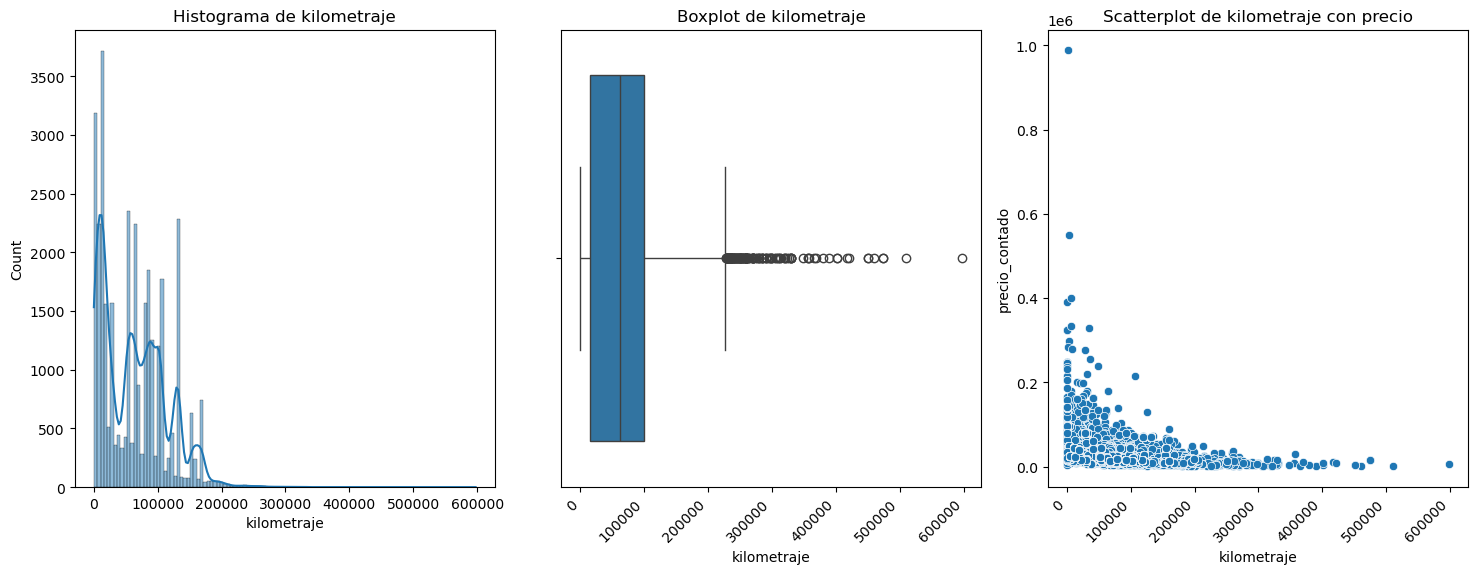

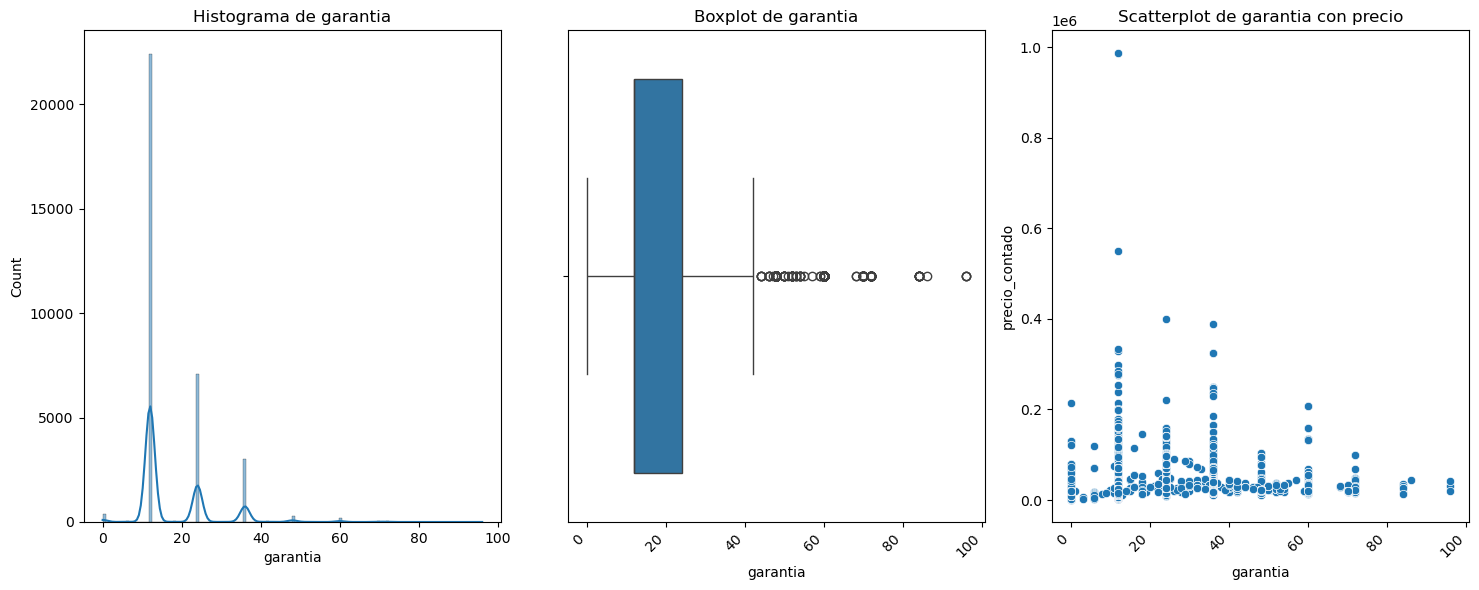

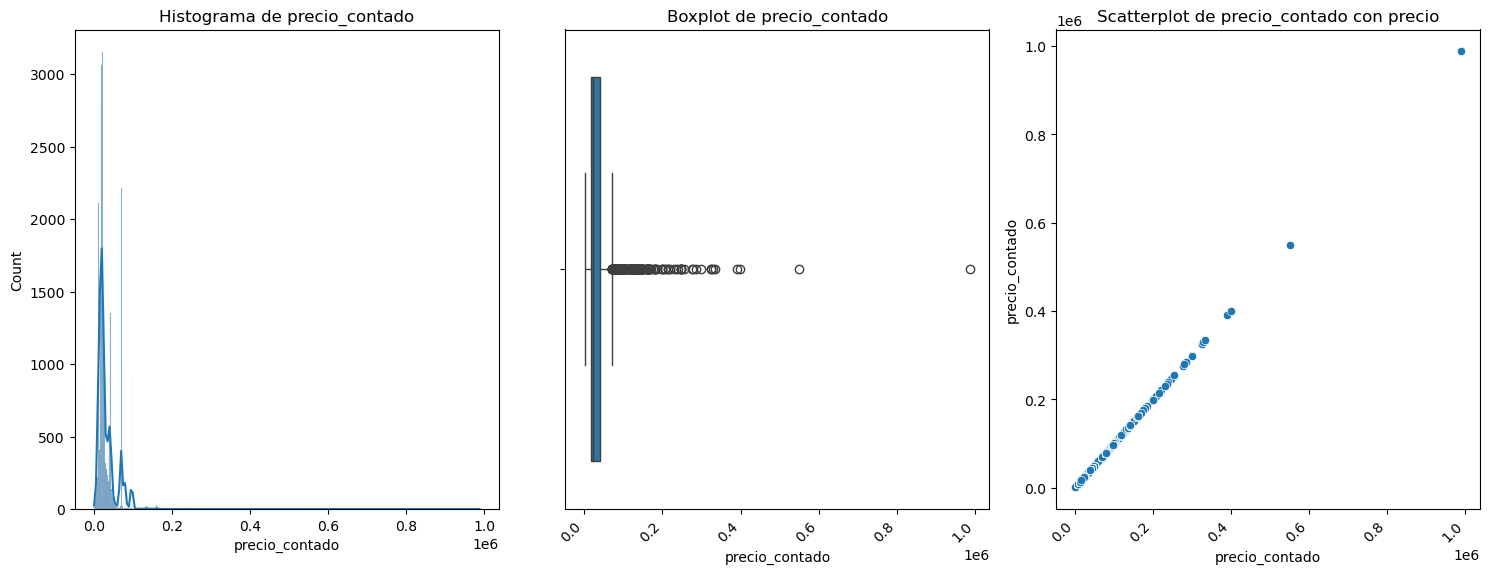

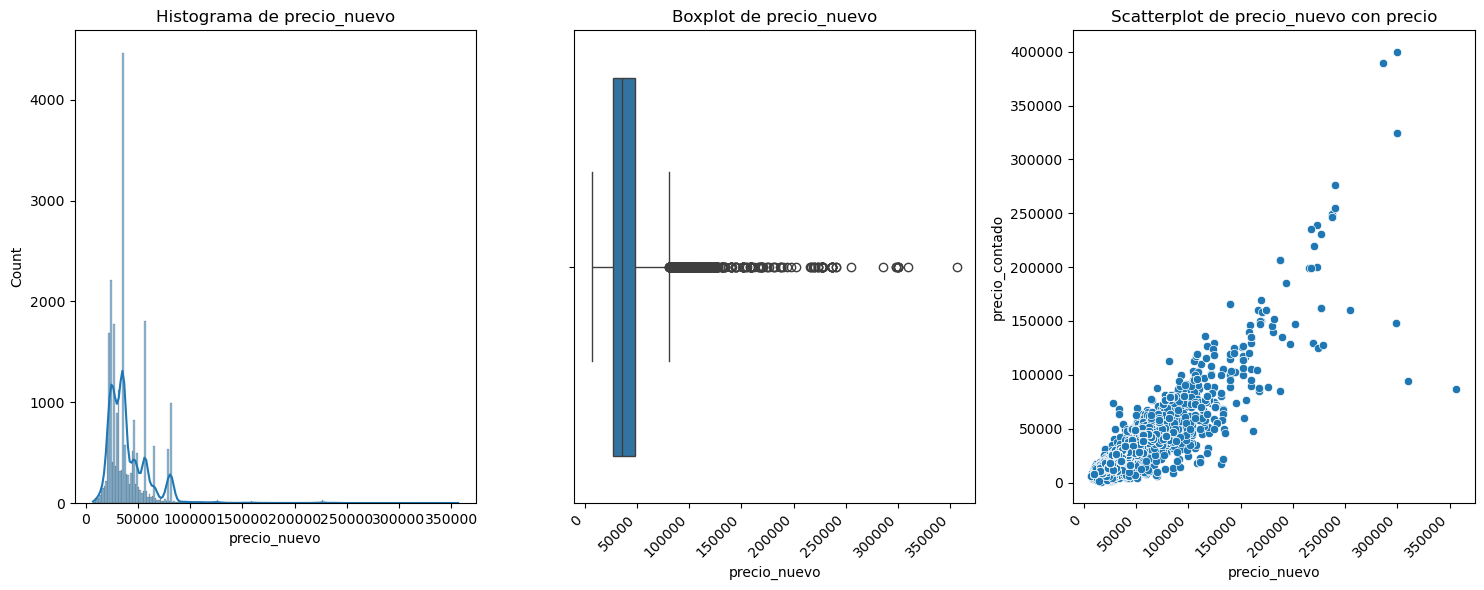

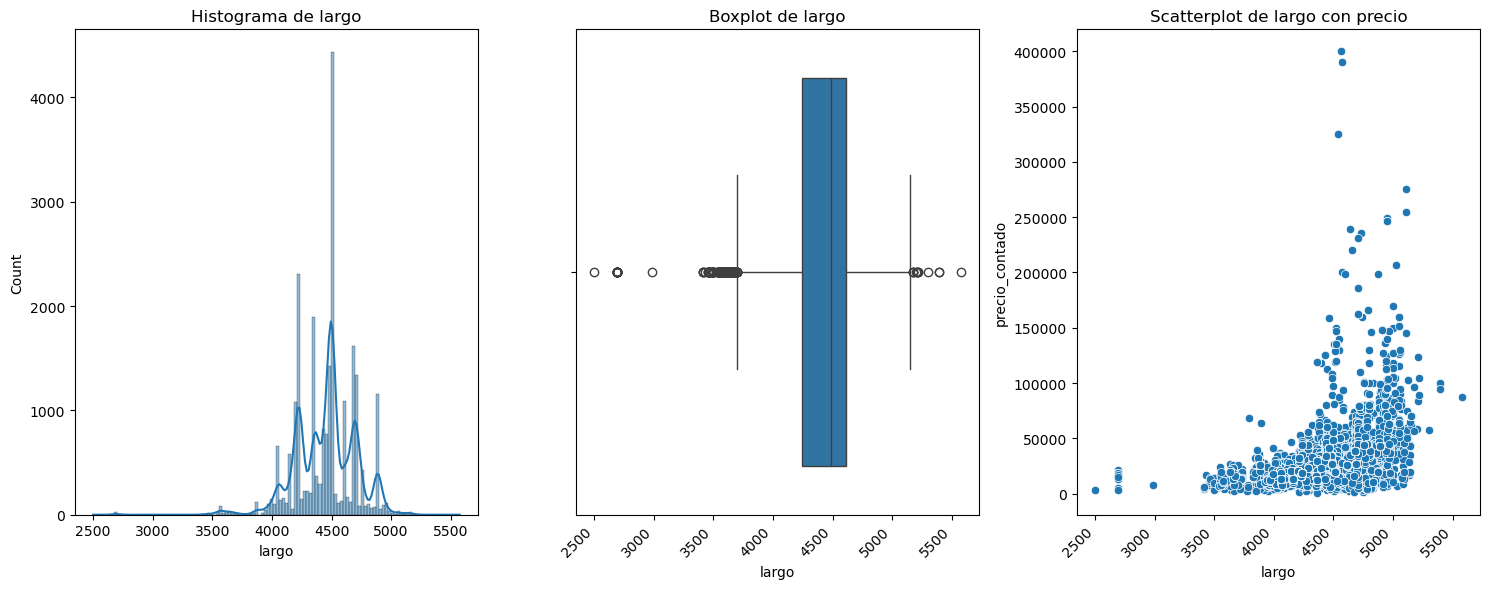

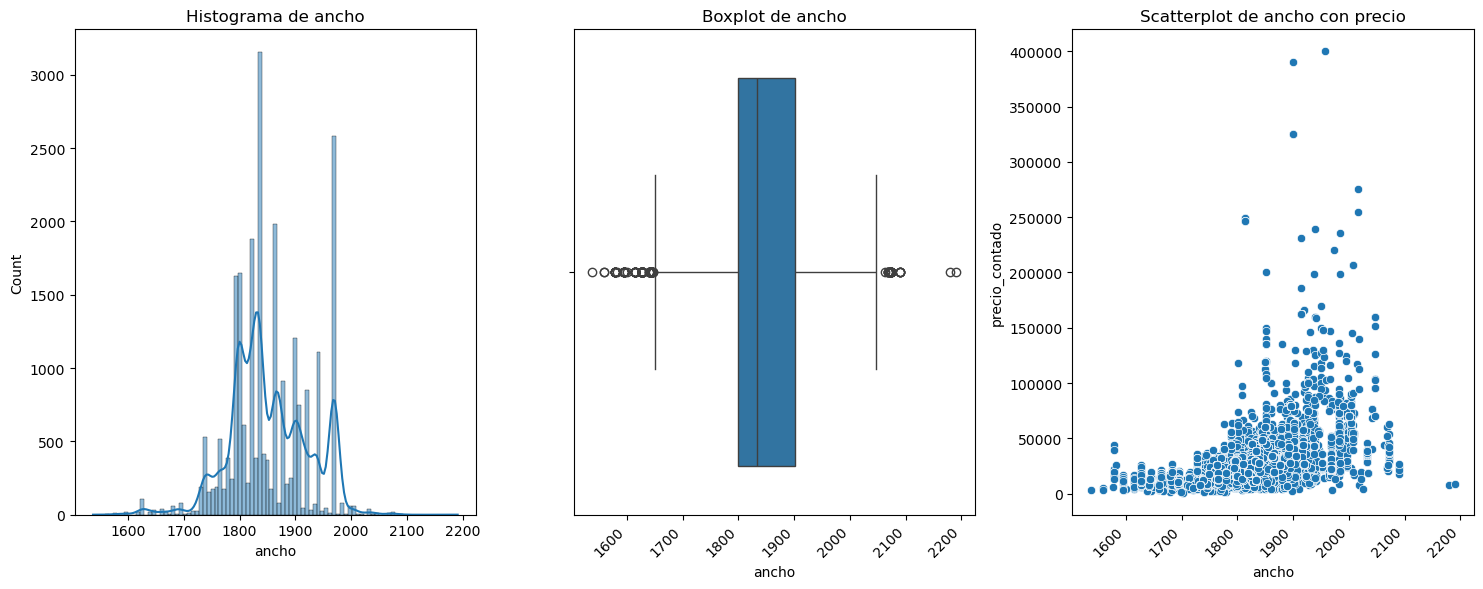

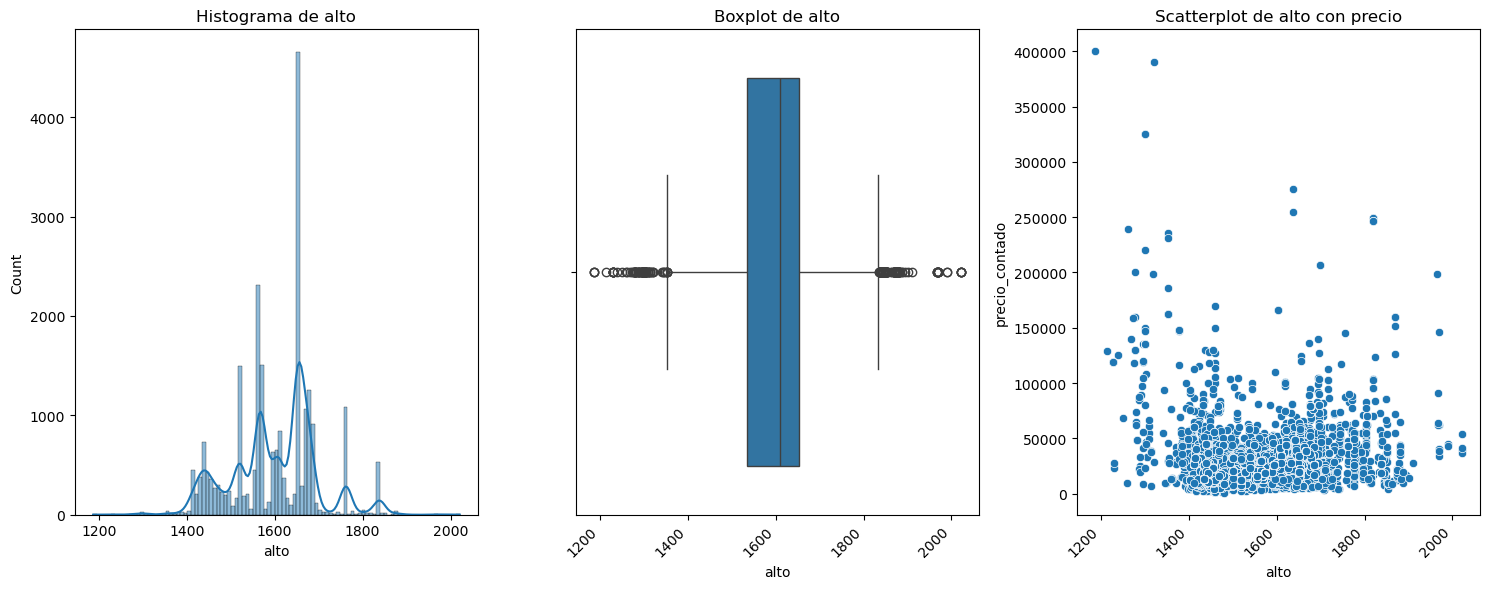

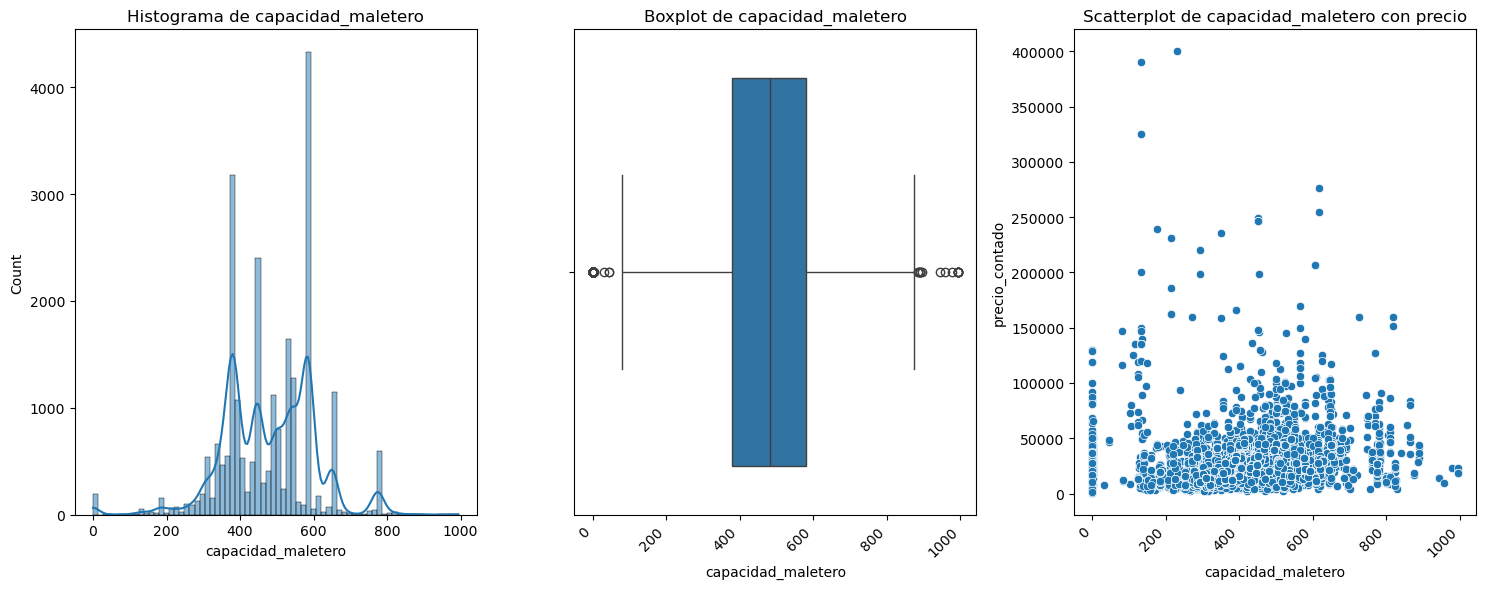

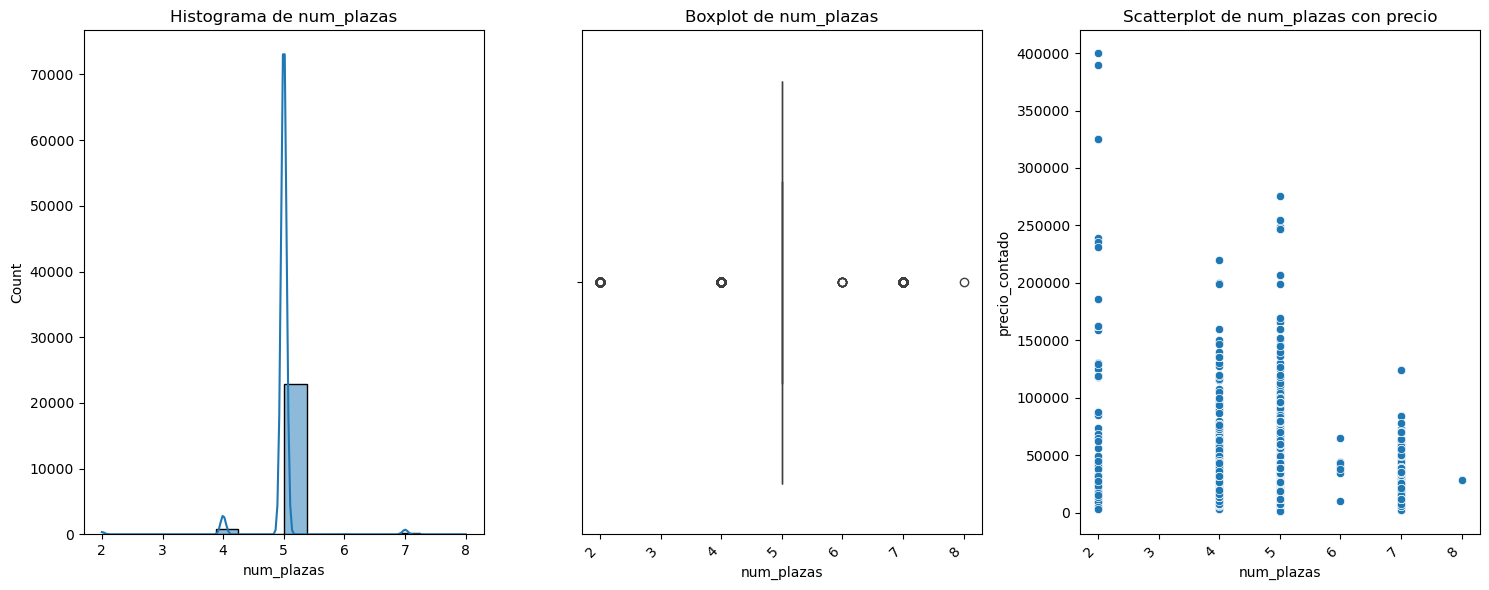

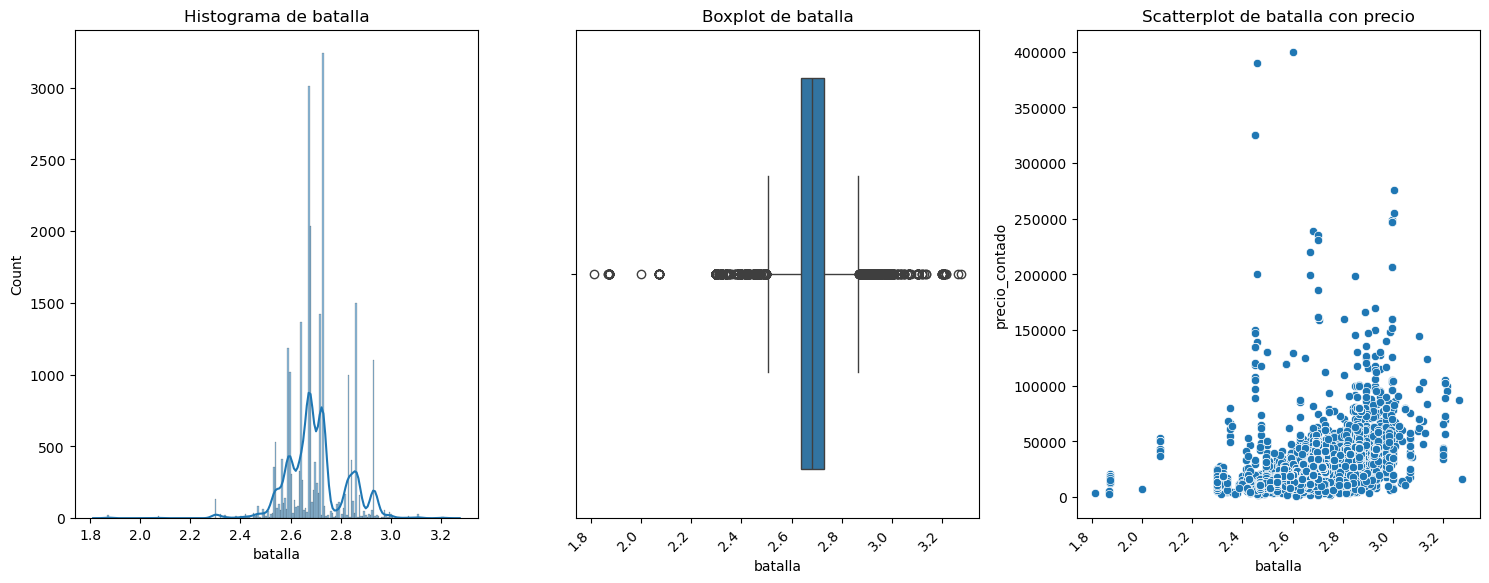

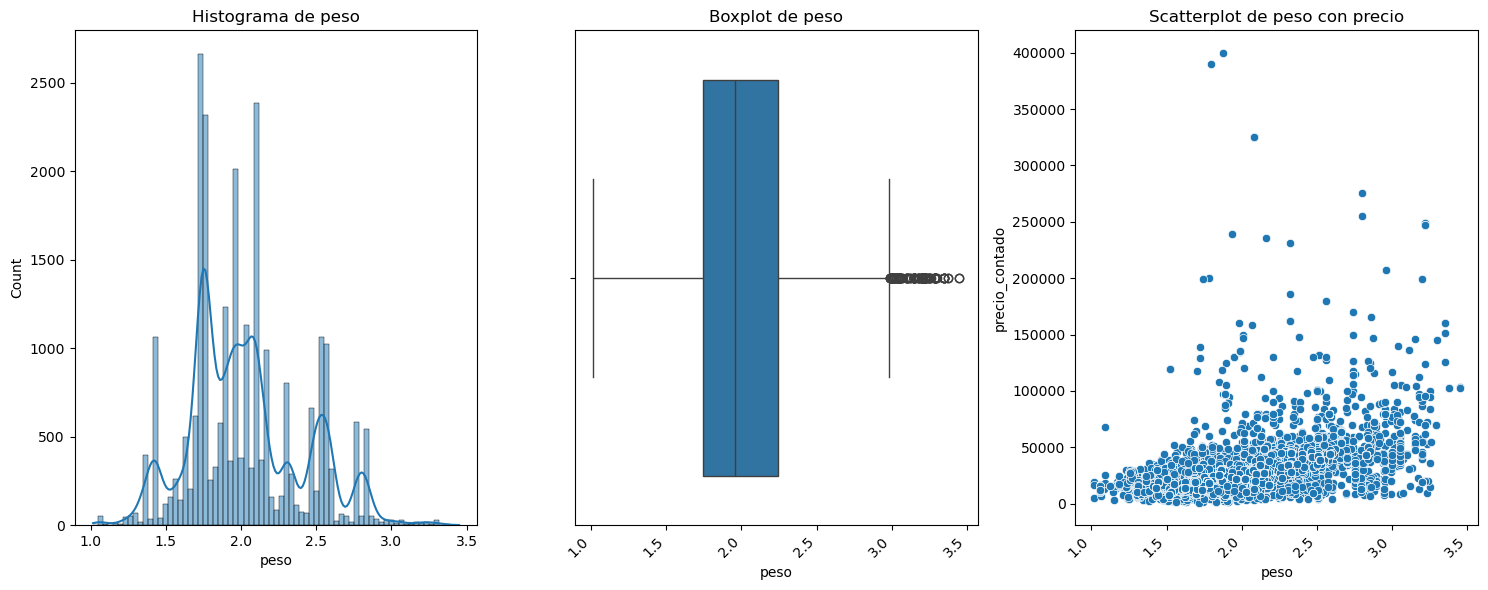

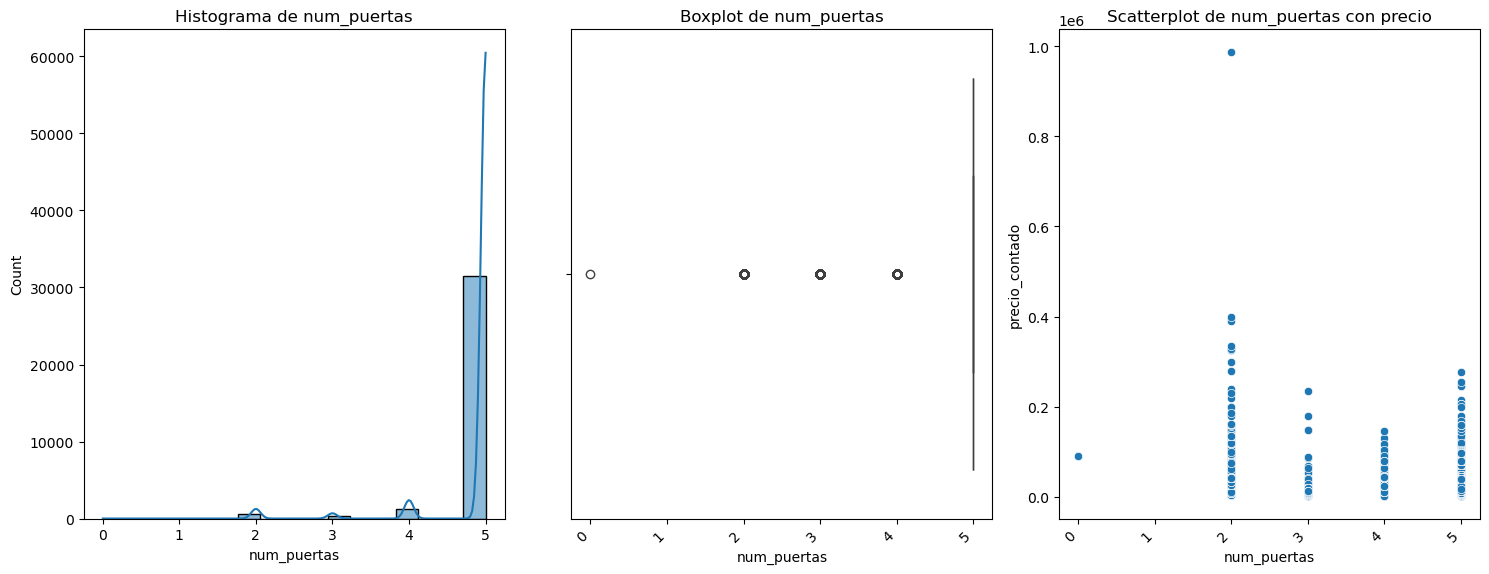

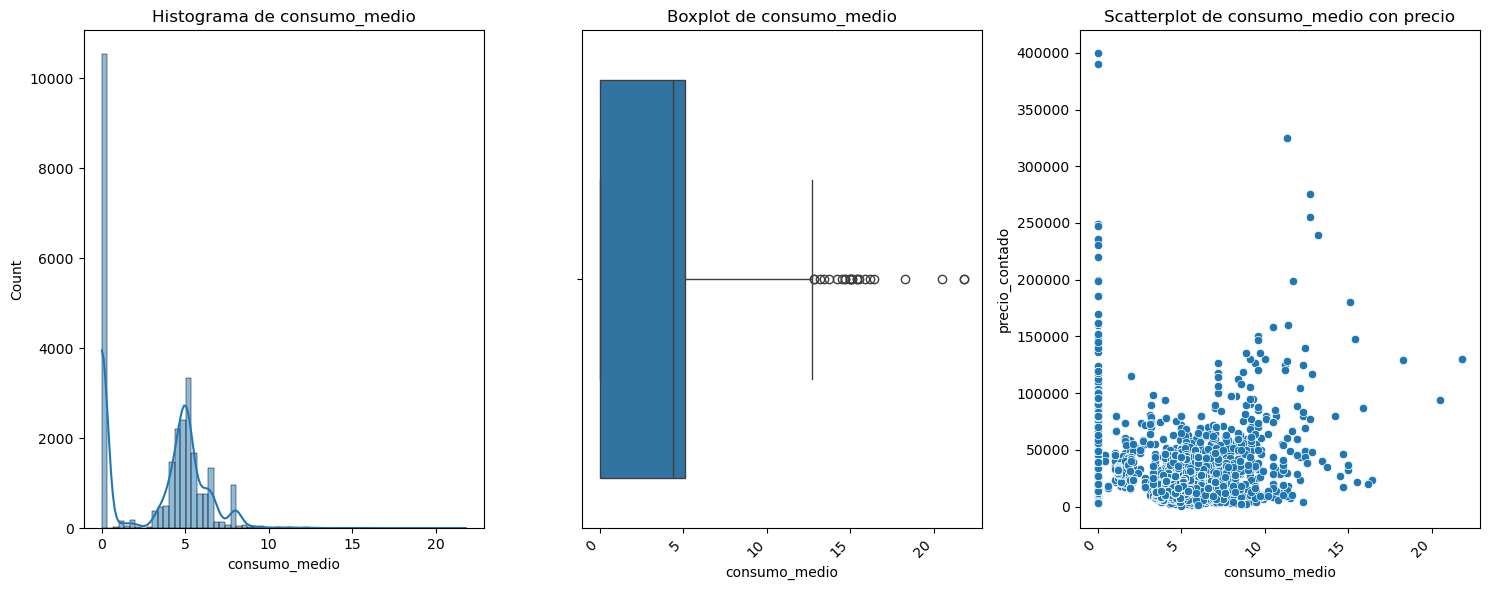

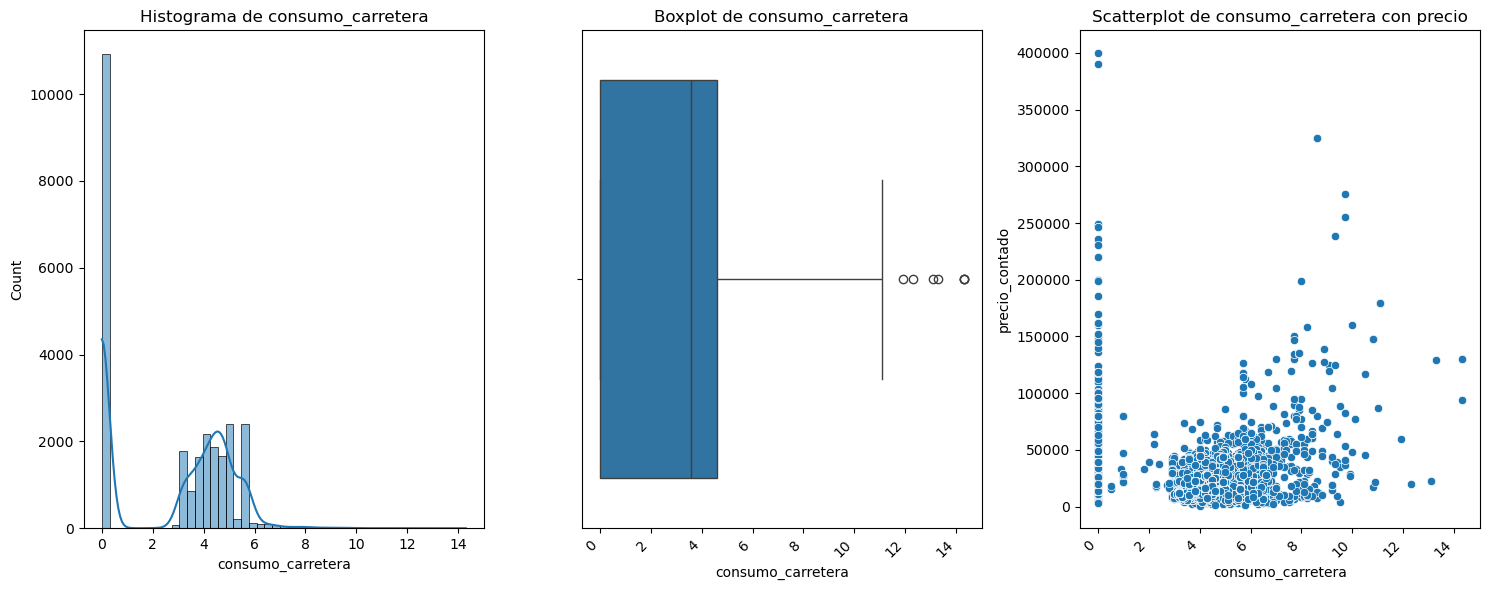

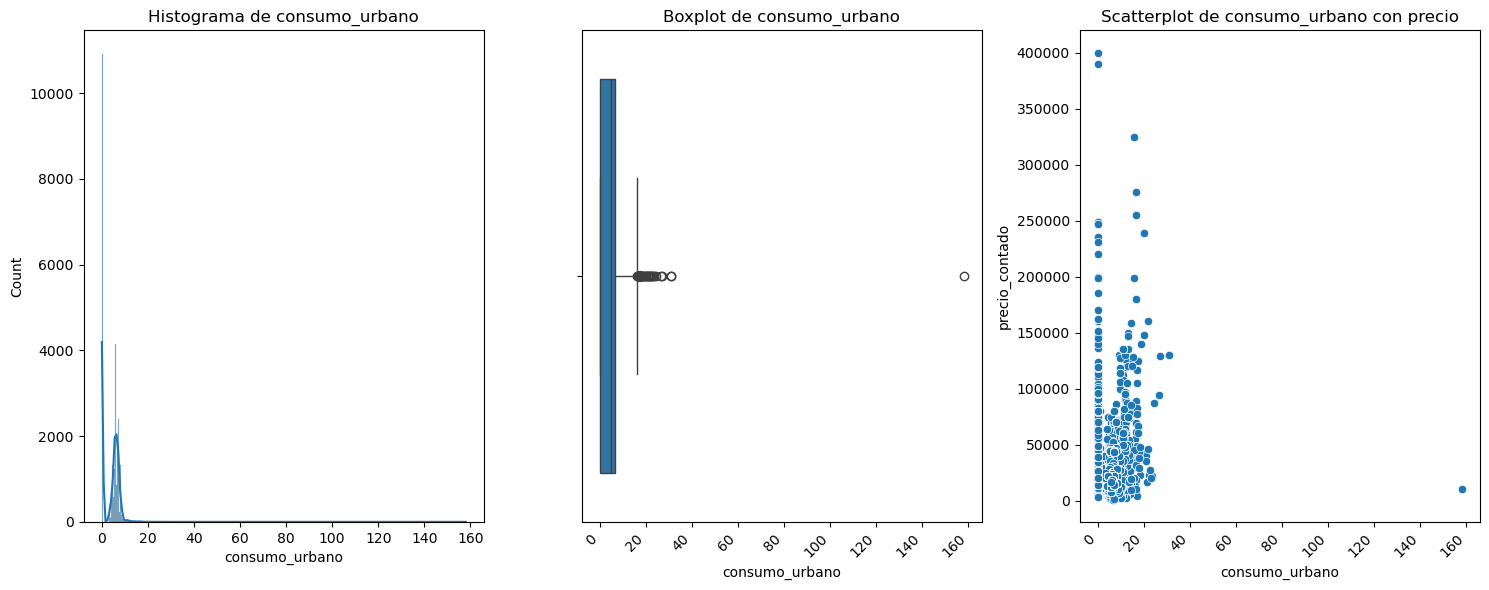

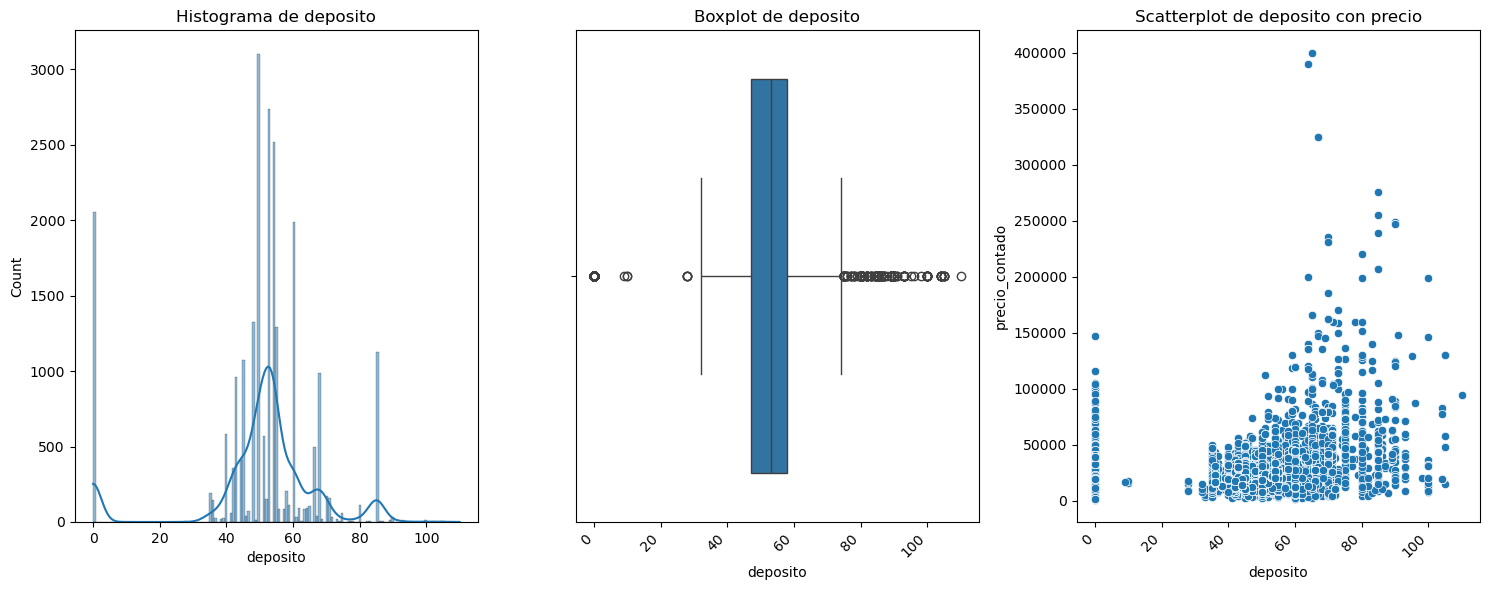

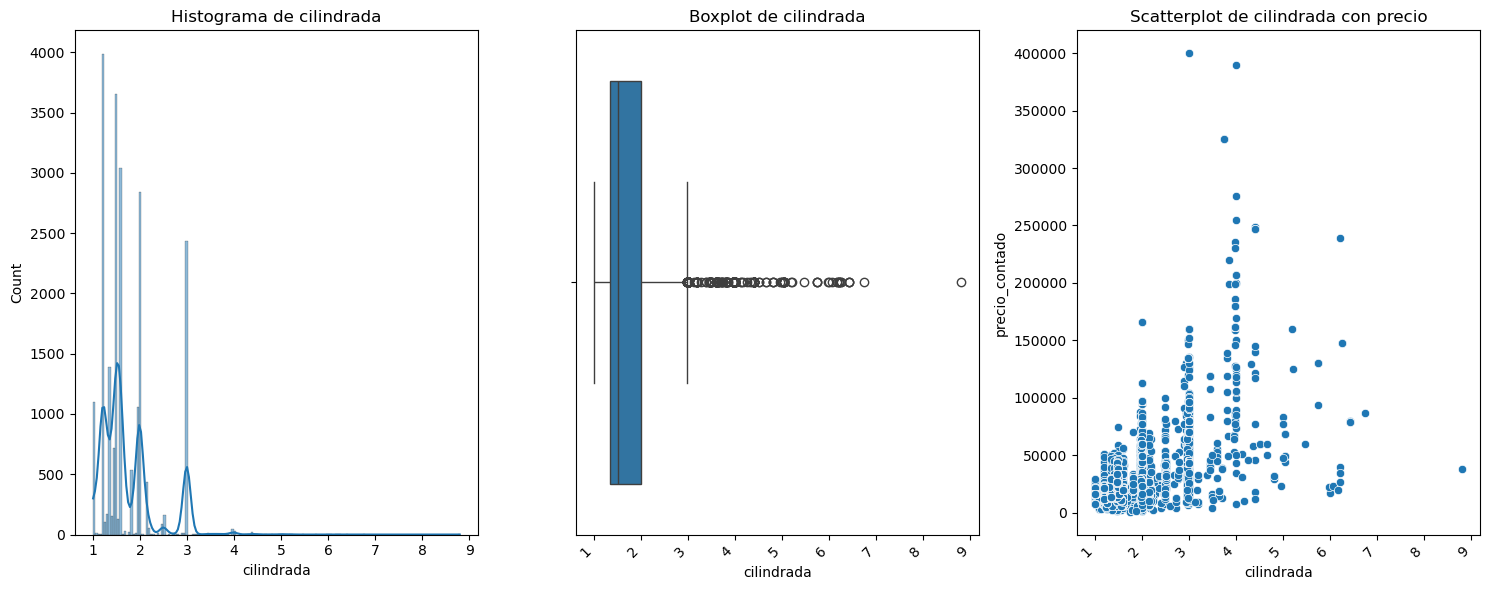

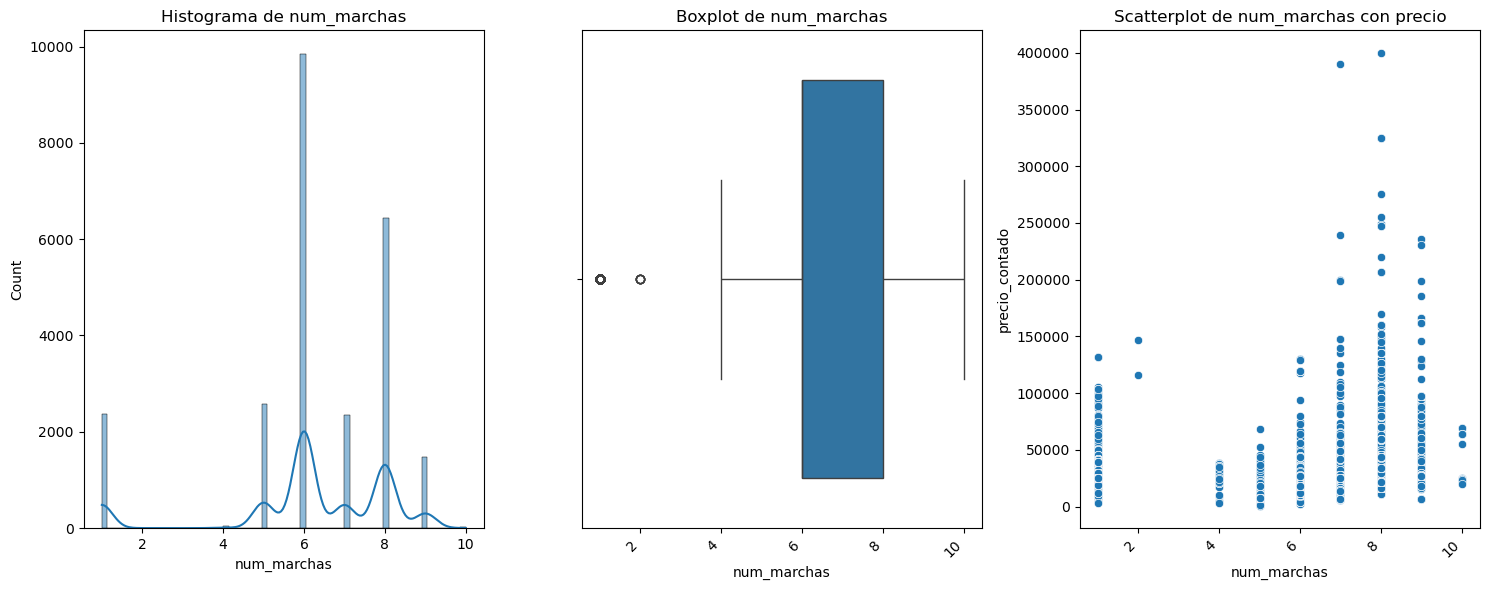

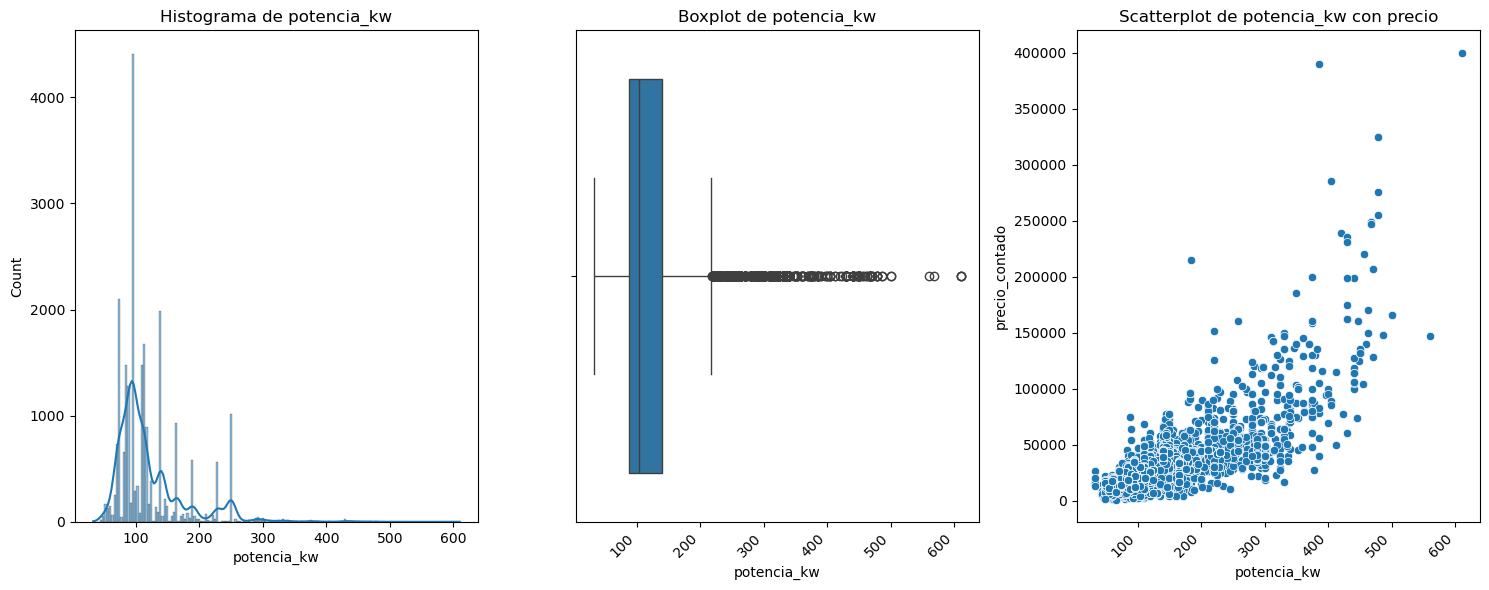

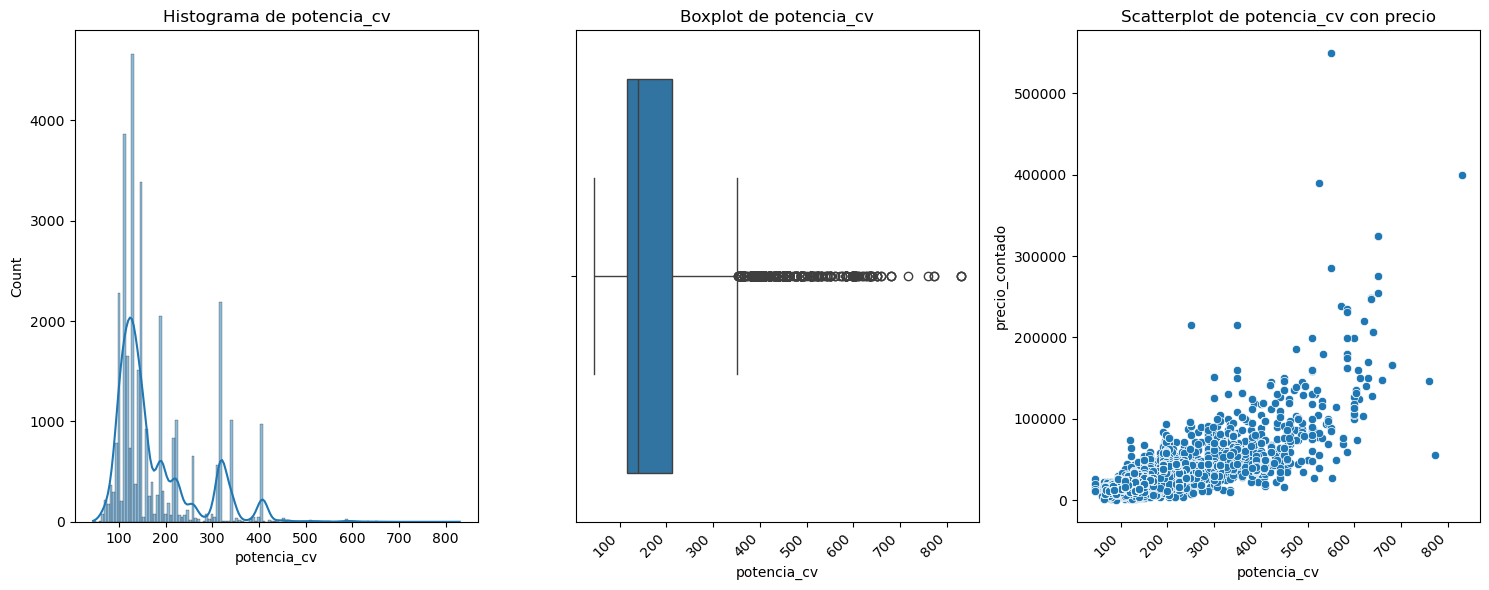

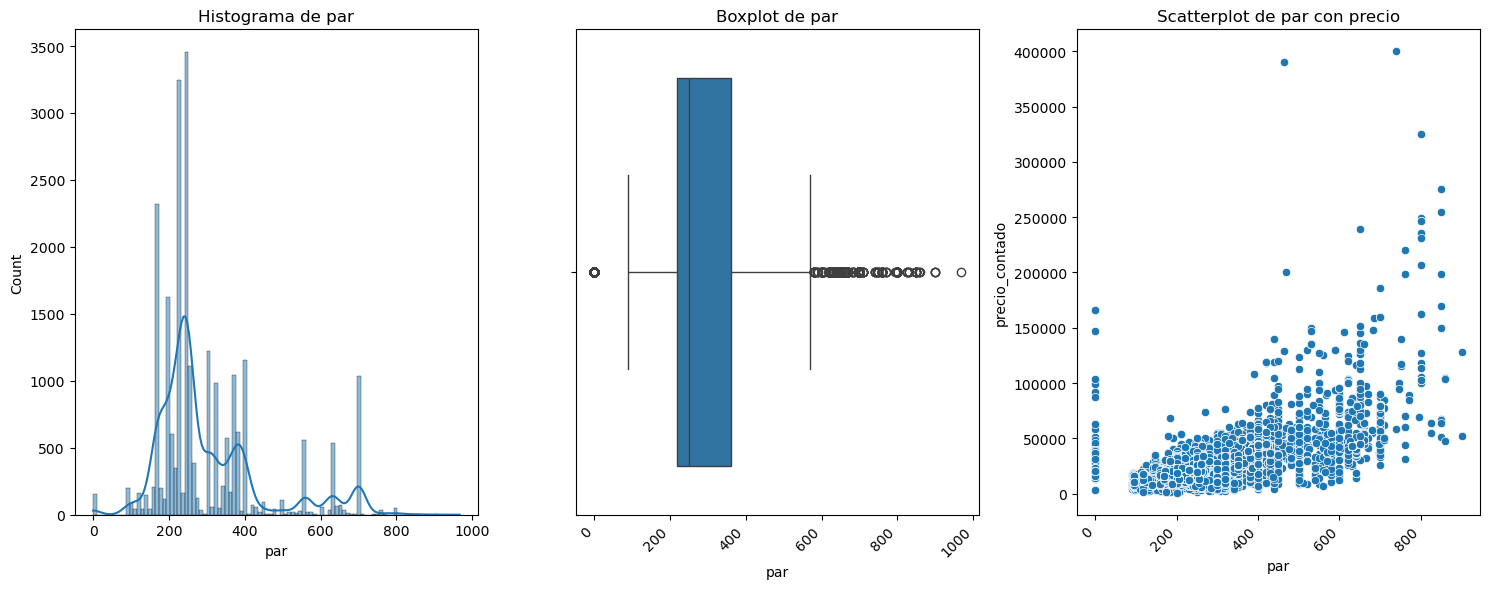

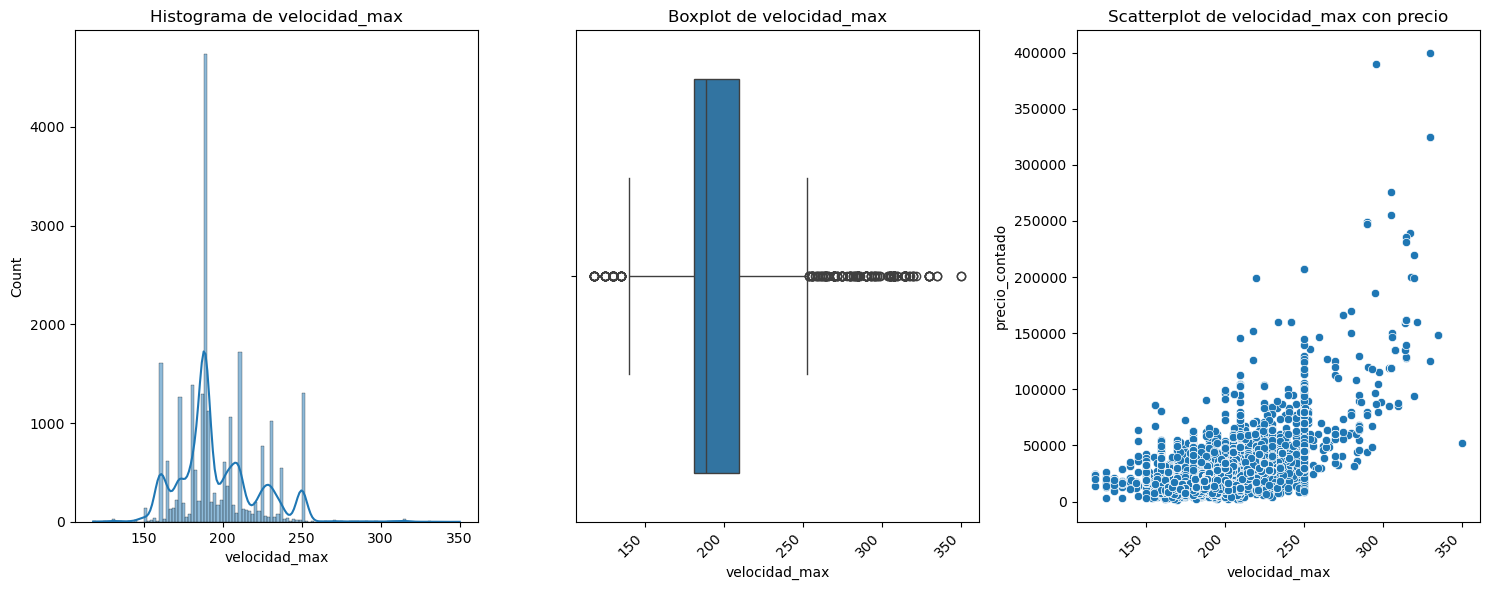

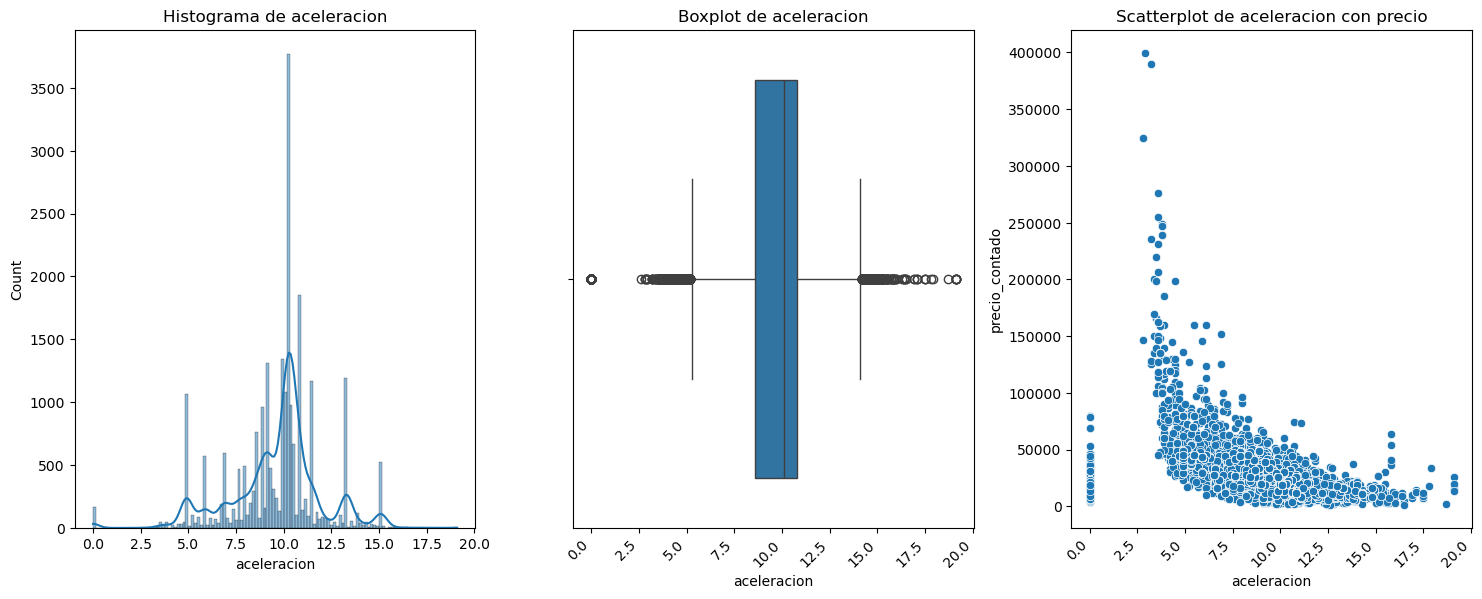

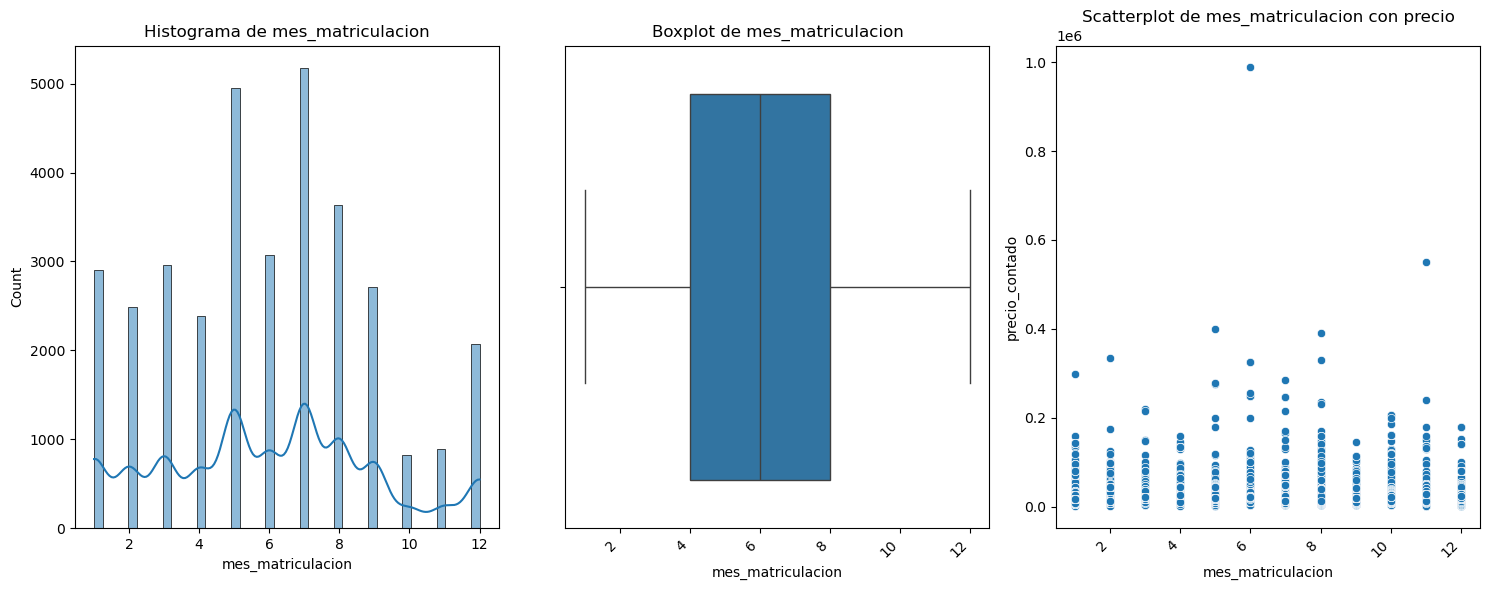

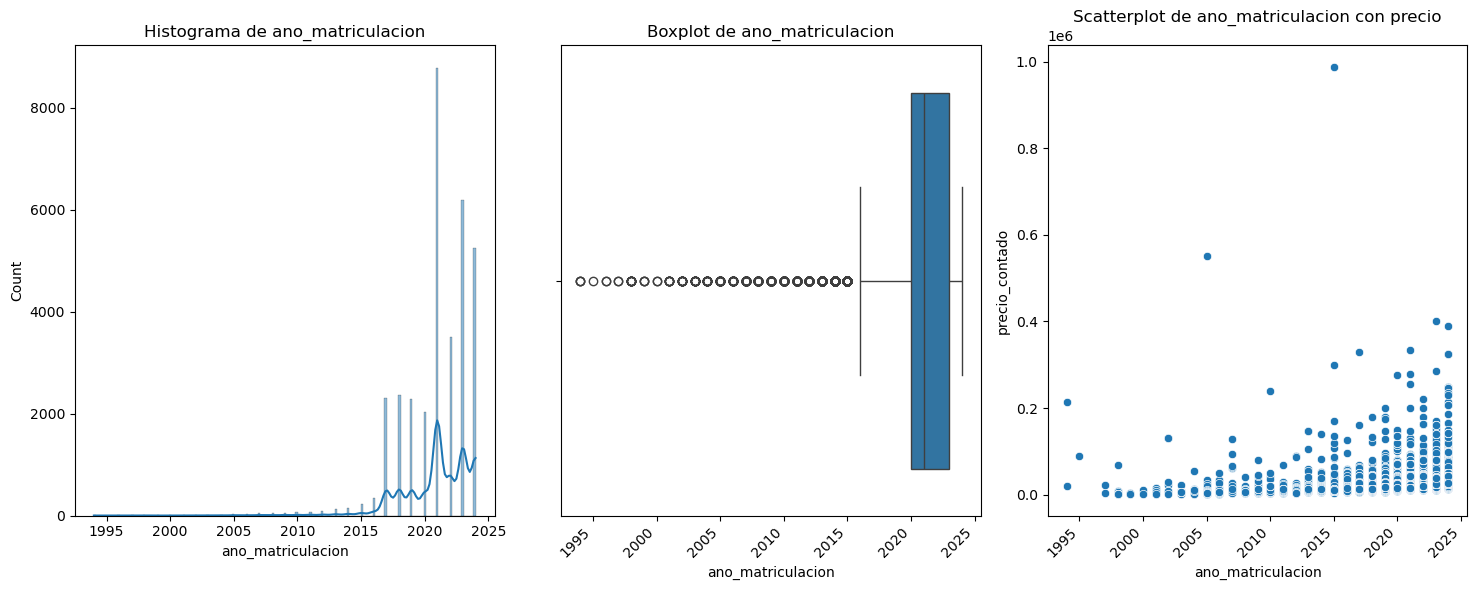

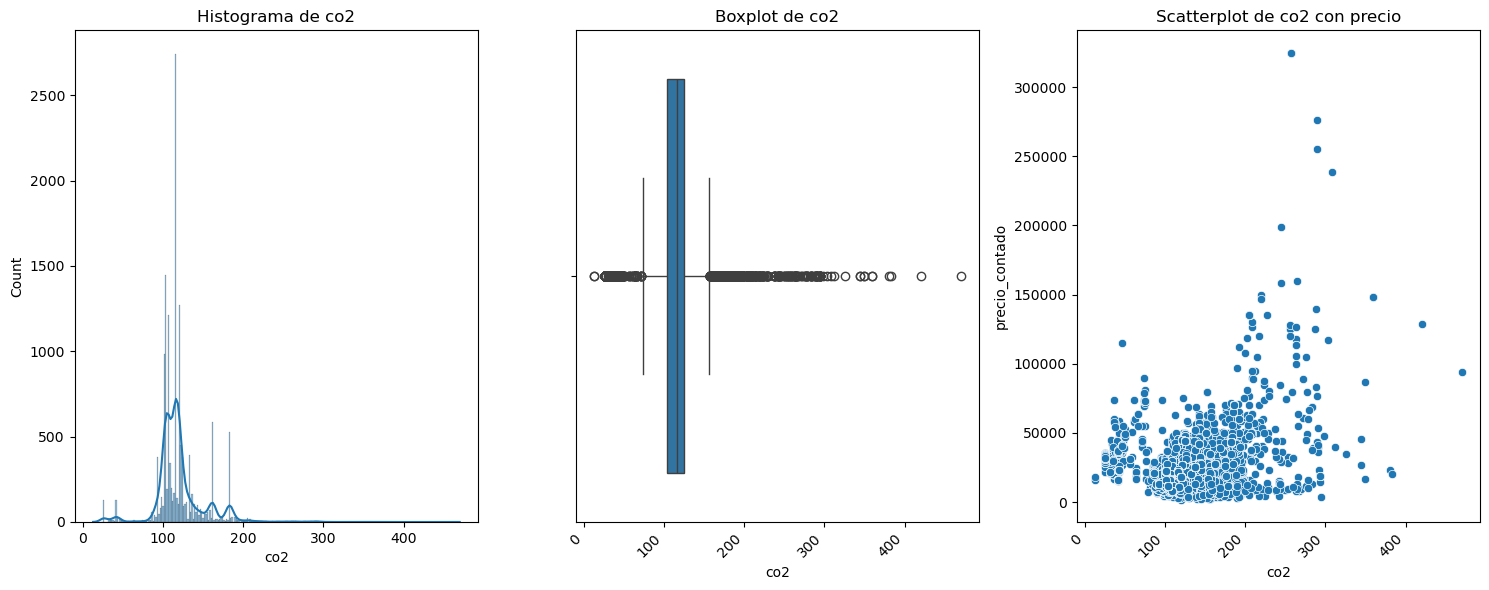

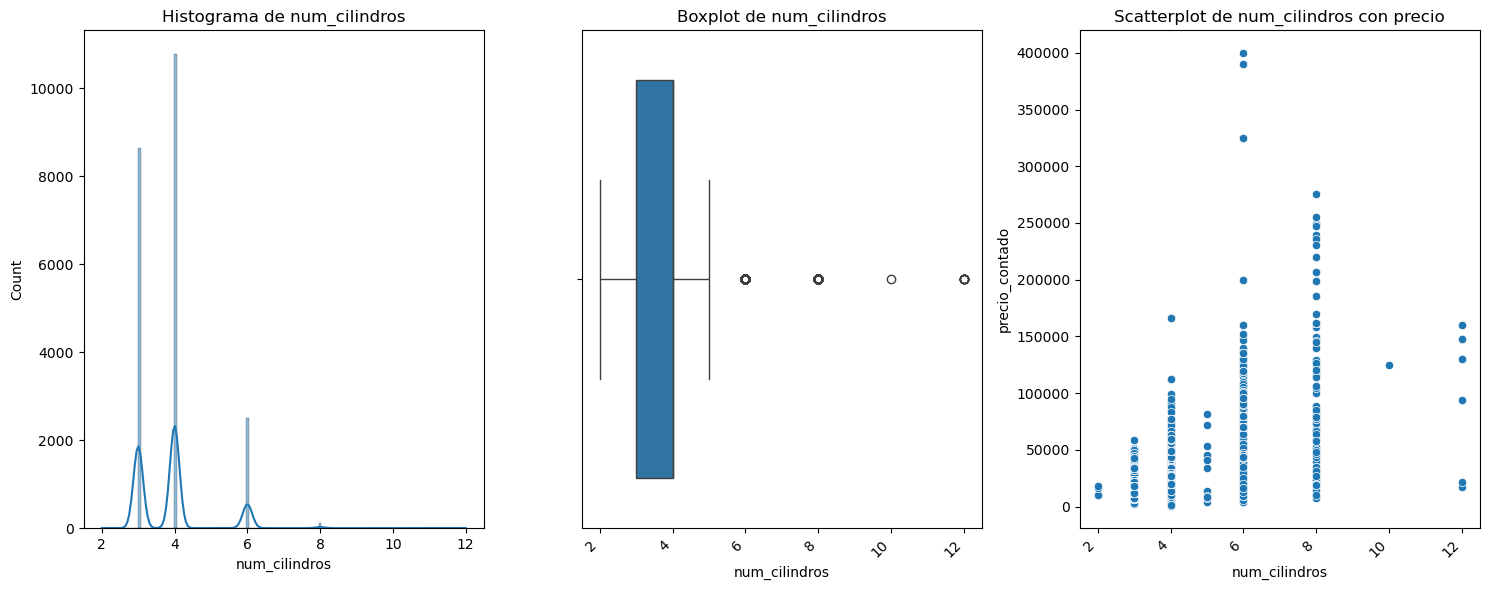

In [48]:
for columna in continuous_columns:
    metricas(df, columna)

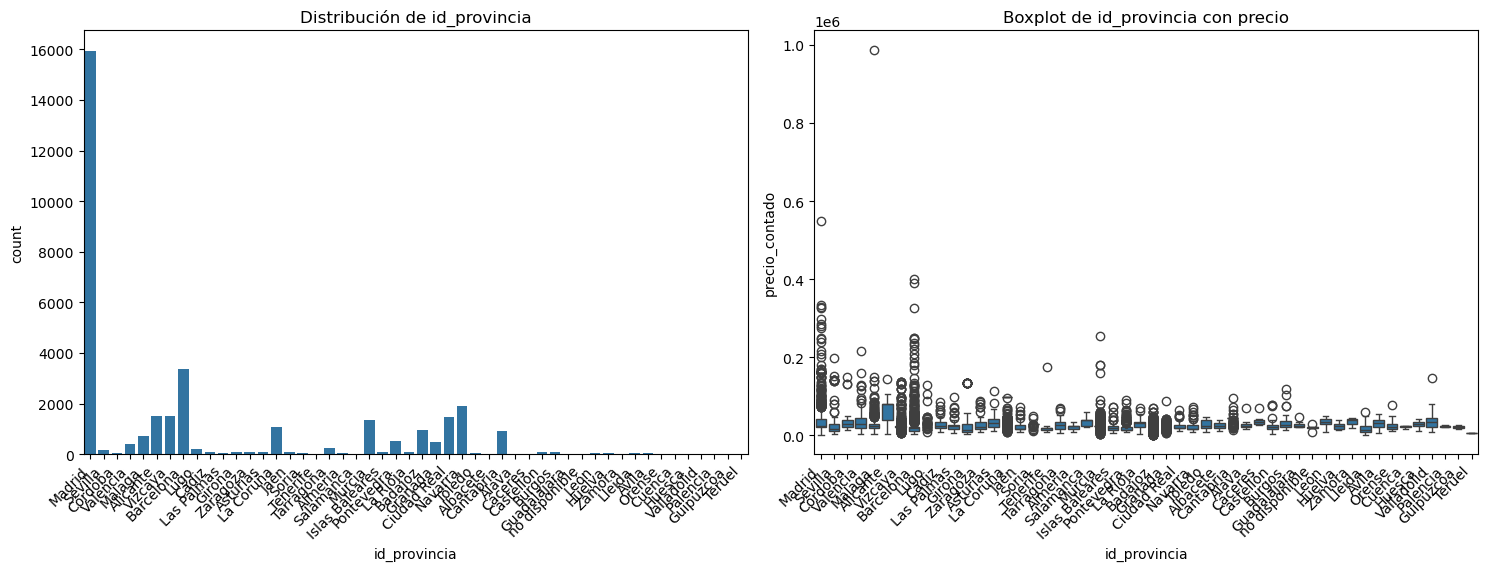

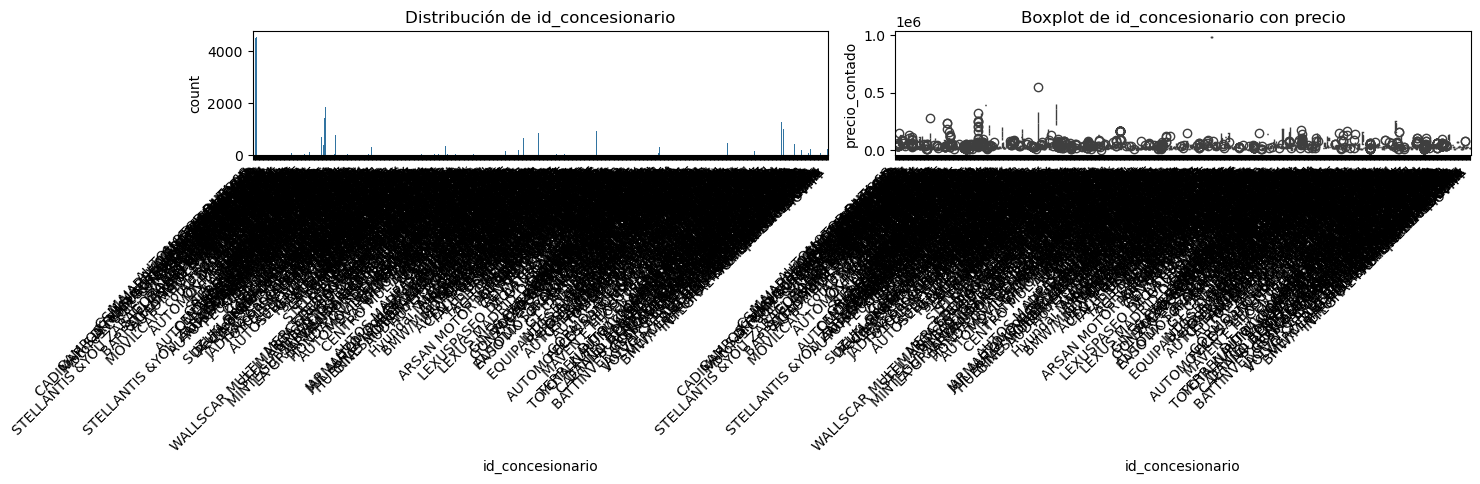

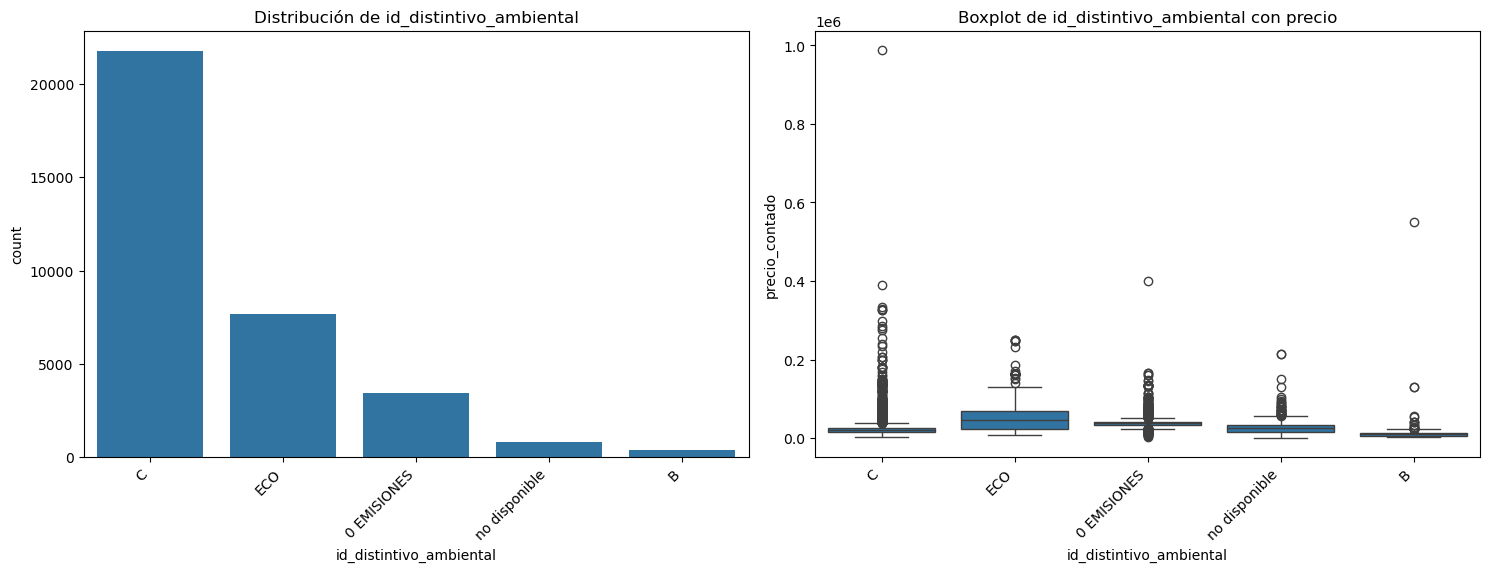

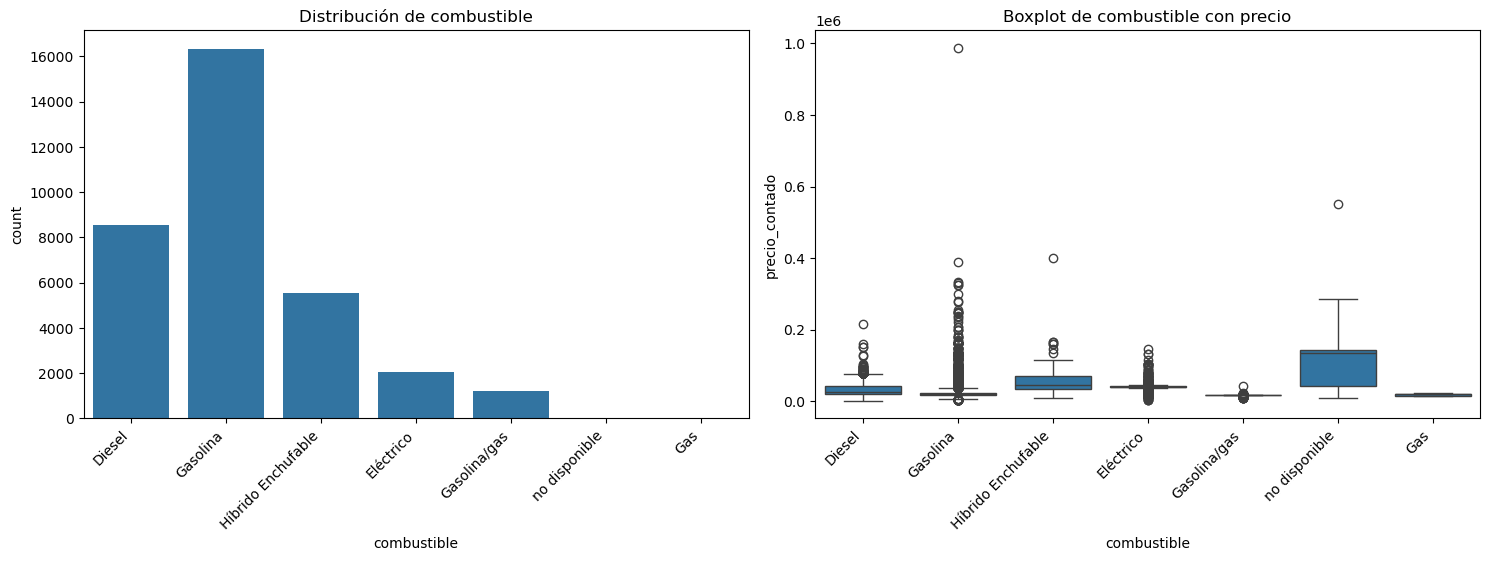

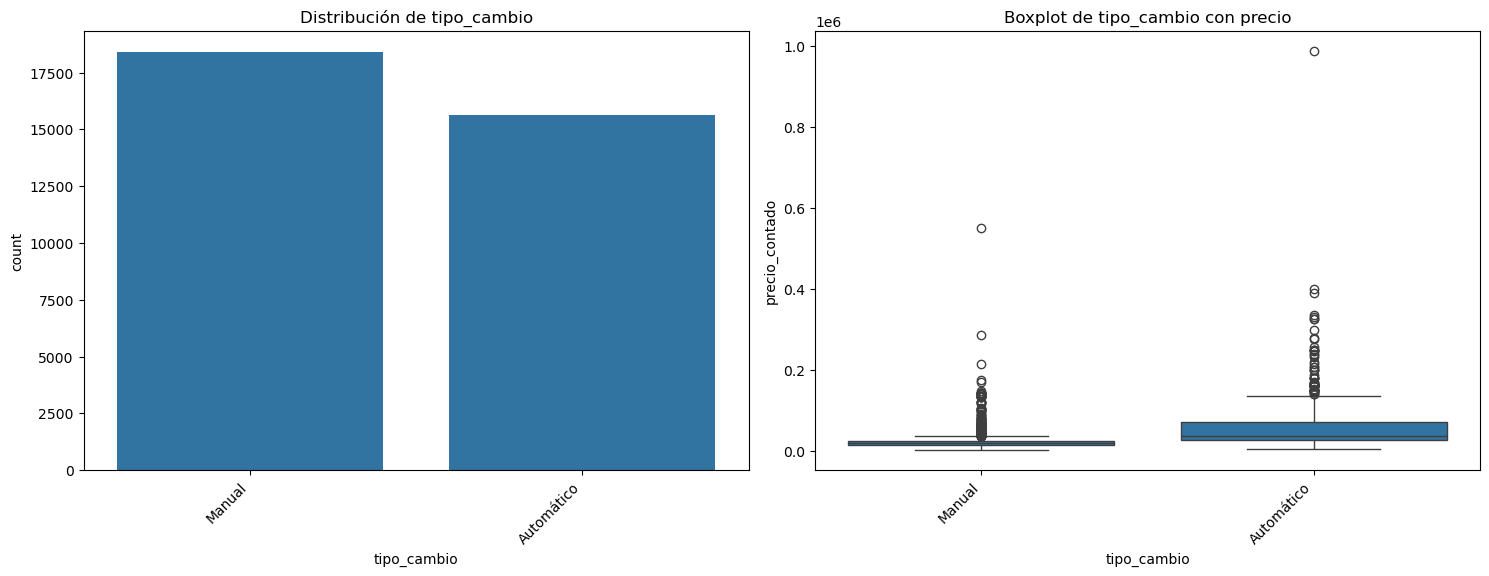

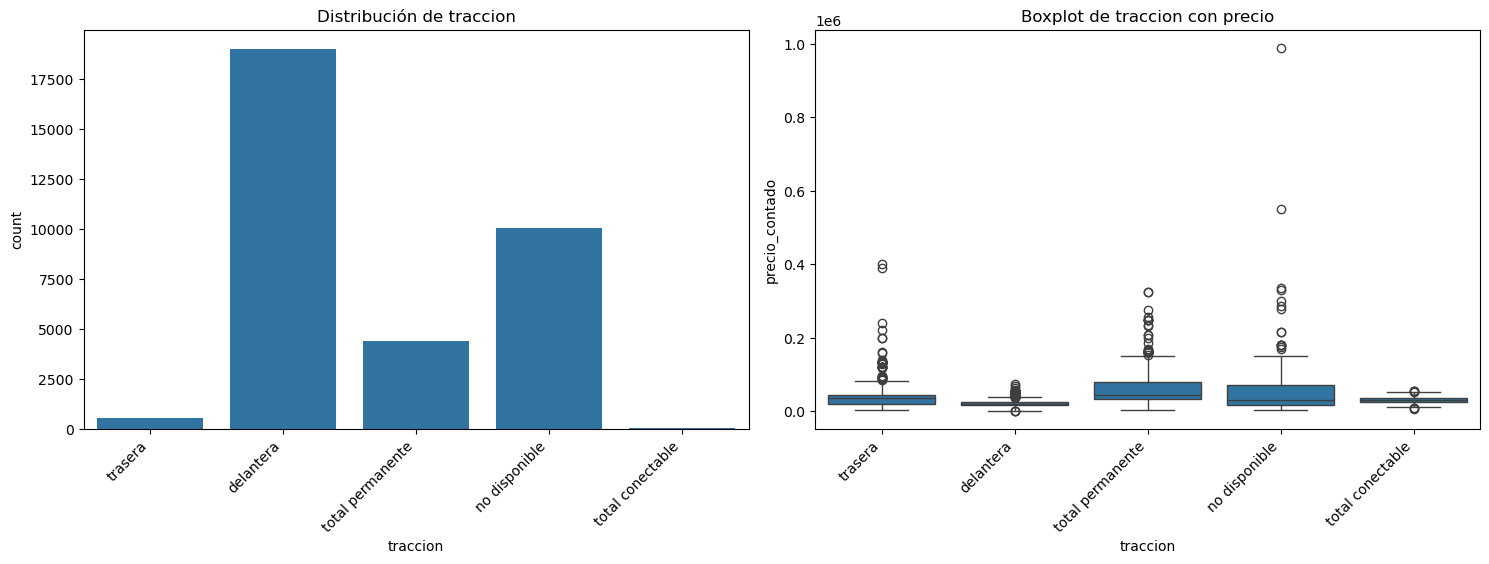

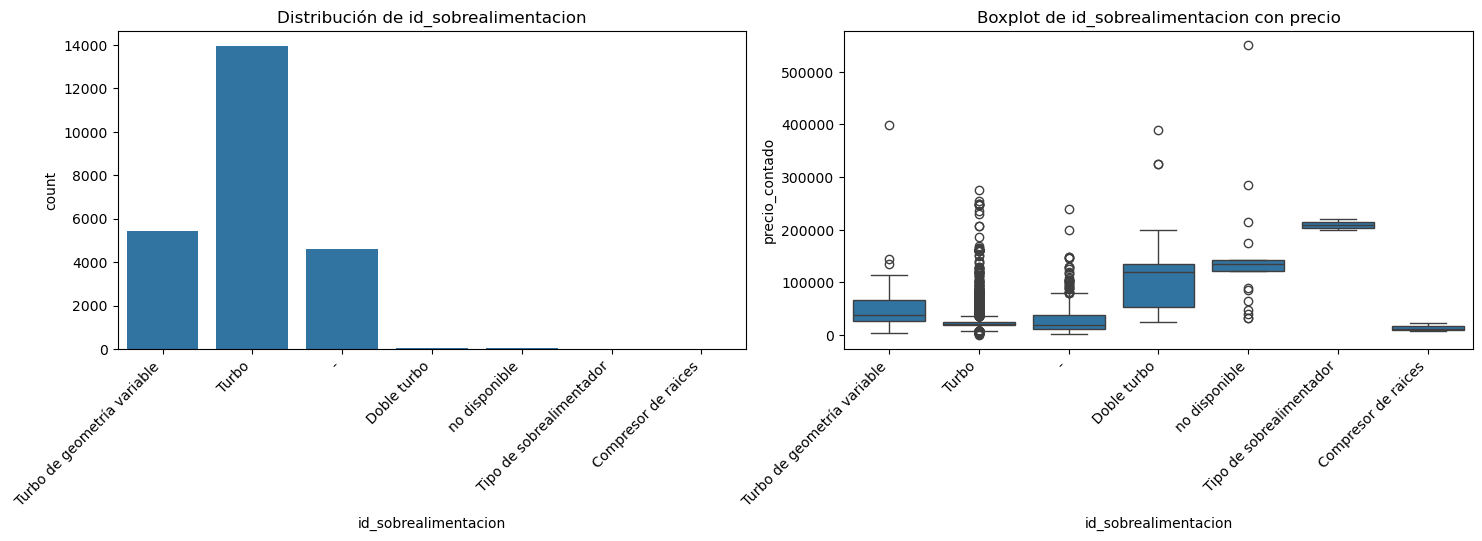

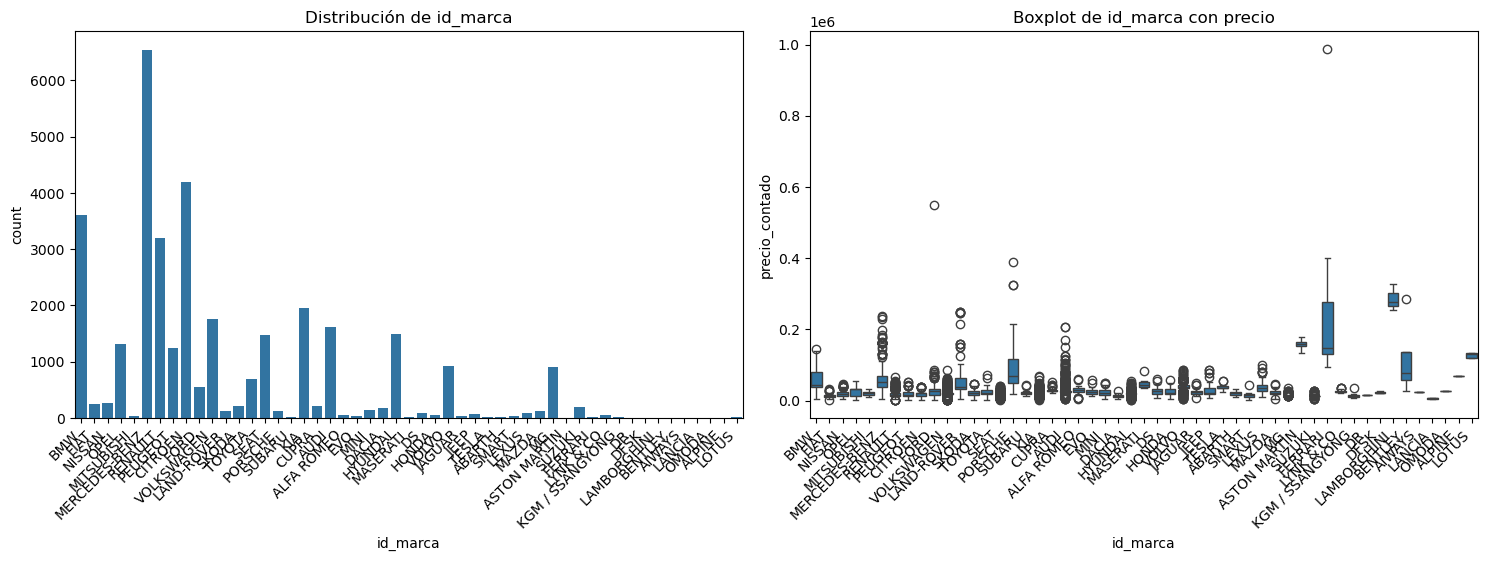

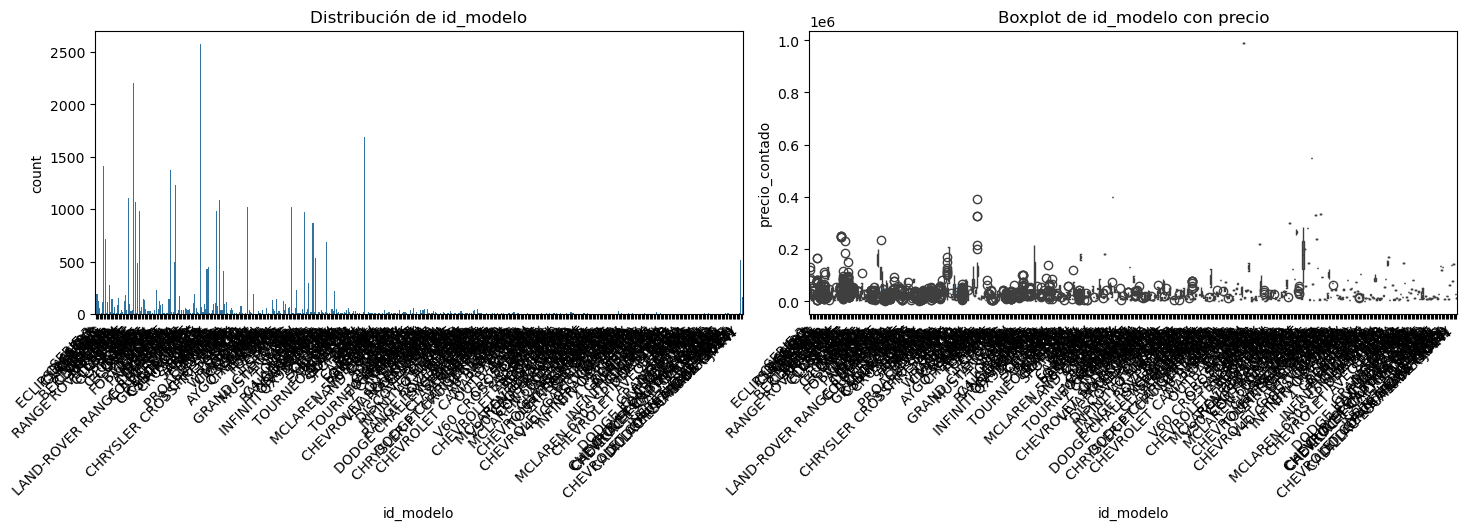

In [50]:
for columna in categorical_columns:
    metricas(df, columna)

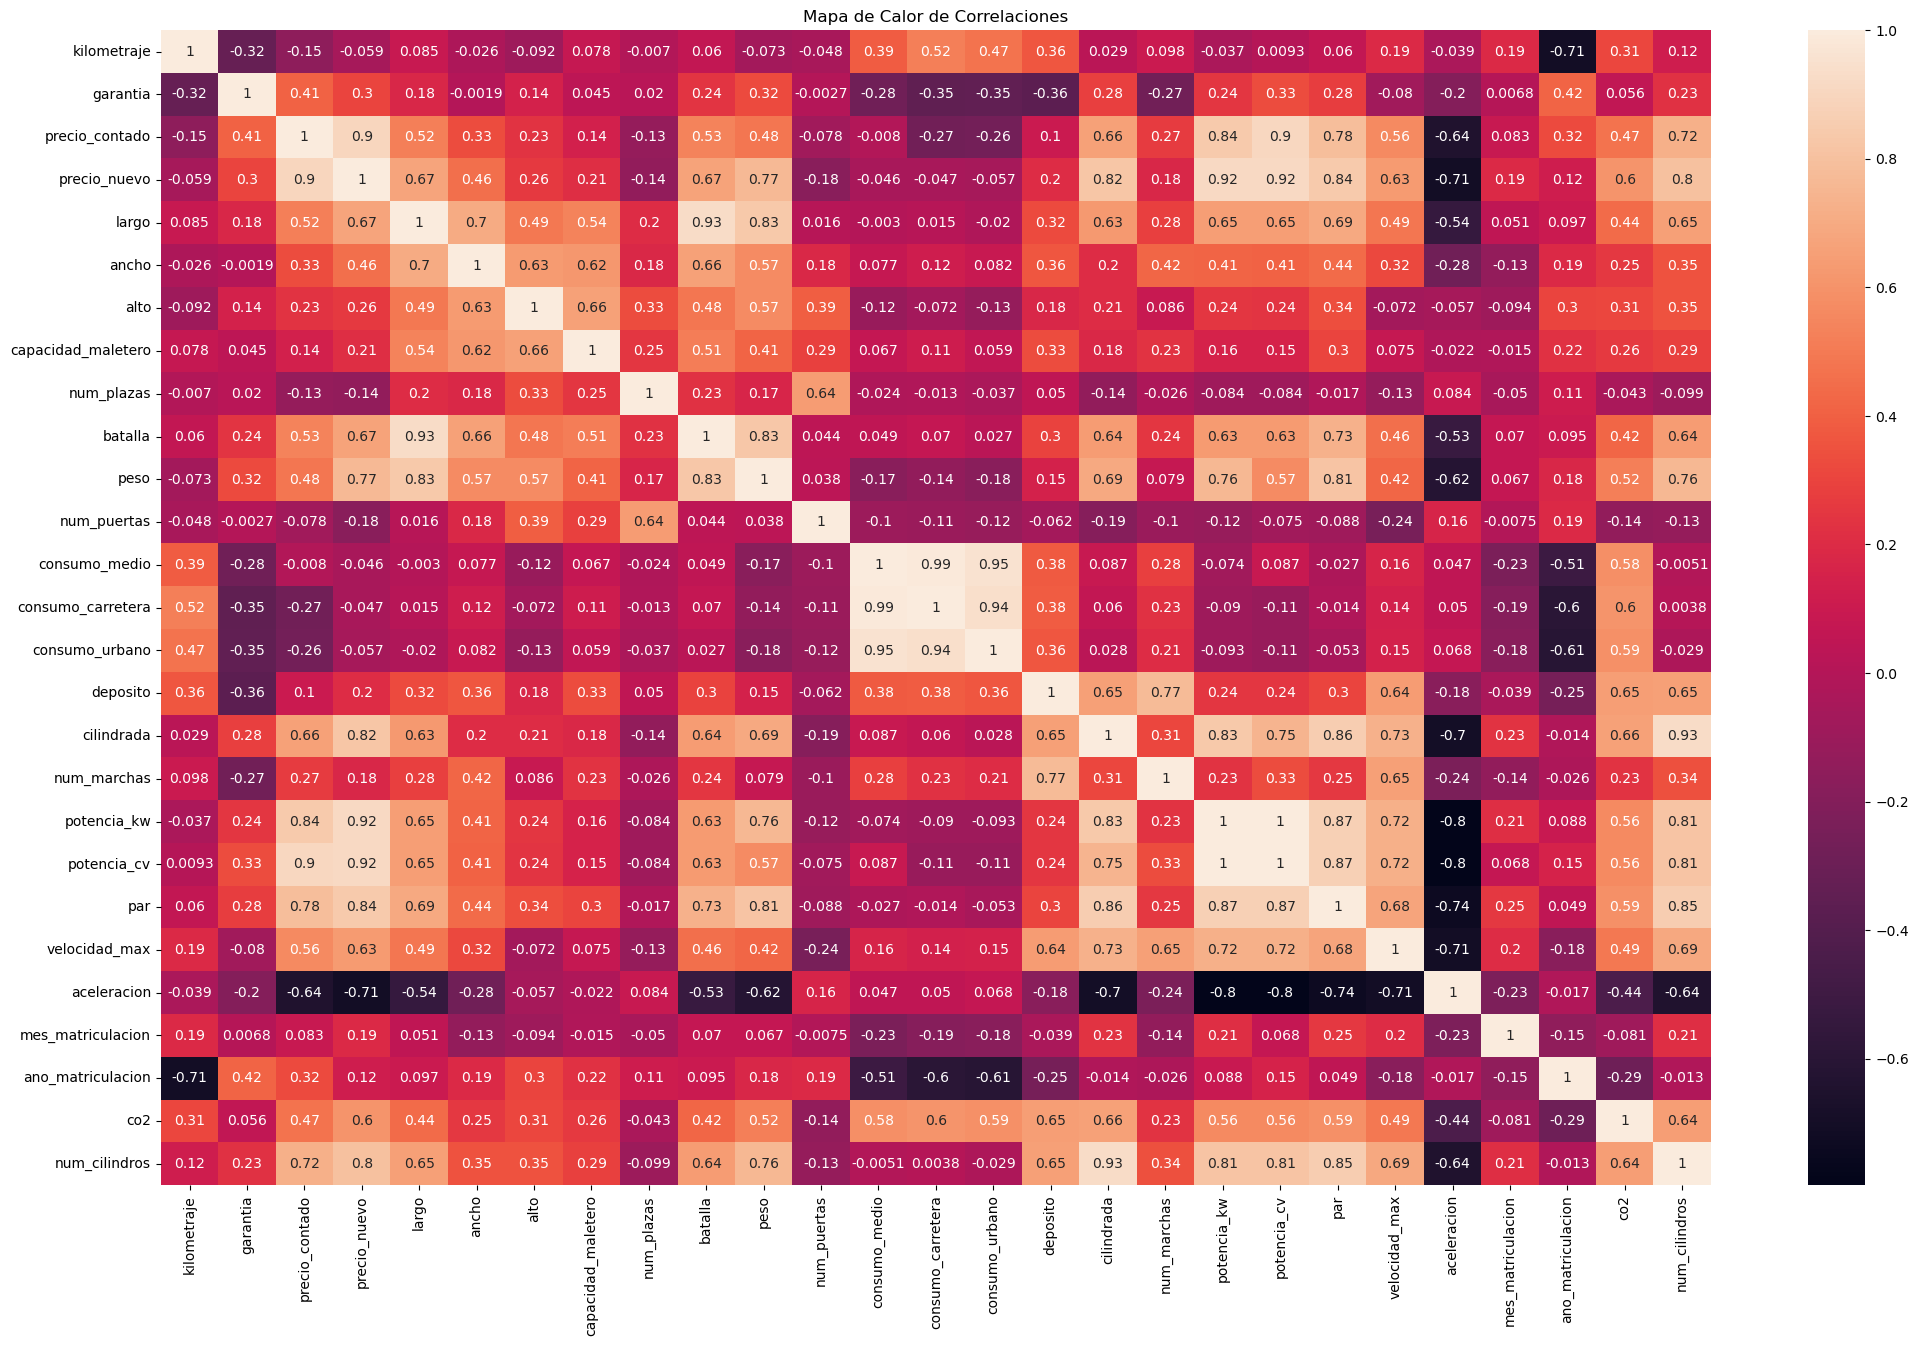

In [51]:
correlation_matrix = df[continuous_columns].corr()

plt.figure(figsize=(25, 15))

sns.heatmap(correlation_matrix, annot=True)

plt.title('Mapa de Calor de Correlaciones')
plt.show()

## Eliminación outliers

In [54]:
df_sin_outliers = df.copy()

In [56]:
def prueba_outliers_tukey(col, lado_outliers, k=1.5):
    if col not in num_cols:
        print(f'La columna {col} no es numérica o no existe')
        return
    
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    ric = q3 - q1

    if lado_outliers == 'derecho':
        lim_l = df[col].min()
        lim_r = q3 + k * ric

    elif lado_outliers == 'izquierdo':
        lim_l = q1 - k * ric
        lim_r = df[col].max()

    elif lado_outliers == 'ambos':
        lim_l = q1 - k * ric
        lim_r = q3 + k * ric

    else: 
        print(f'No has indicado un lado válido para los outliers. Usa "derecho", "izquierdo", o "ambos".')
        return
    
    porcentaje = df[df[col].between(lim_l, lim_r) | df[col].isna()].shape[0] / df.shape[0] * 100
    print(lim_l, lim_r)
    print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {col} después de eliminar los outliers.')
    
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(1, 2)
        
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(df[col], kde=True, ax=ax1)
    plt.axvline(lim_l, color='red')
    plt.axvline(lim_r, color='red')
    ax1.set_title(f'Histograma de {col}')
    ax1.set_xlabel(col)
        
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(x=df[col], ax=ax2)
    plt.axvline(lim_l, color='red')
    plt.axvline(lim_r, color='red')
    ax2.set_title(f'Boxplot de {col}')
    ax2.set_xlabel(col)
        
    plt.tight_layout()
    plt.show()

In [58]:
def prueba_outliers_z(col, z=3):
    
    if col not in num_cols:
        print(f'La columna {col} no es numérica o no existe')
        
    mean = df[col].mean()
    std = df[col].std()
    
    lim_l = mean - z*std
    lim_r = mean + z*std
    
    porcentaje = df[df[col].between(lim_l, lim_r) | df[col].isna()].shape[0] / df.shape[0] * 100
    print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {col} después de eliminar los outliers.')
    
    fig = plt.figure(figsize=(14, 6))
    gs = fig.add_gridspec(1, 2)
        
    ax1 = fig.add_subplot(gs[0, 0])
    sns.histplot(df[col], kde=True, ax=ax1)
    plt.axvline(lim_l, color='red')
    plt.axvline(lim_r, color='red')
    ax1.set_title(f'Histograma de {col}')
    ax1.set_xlabel(col)
        
    ax2 = fig.add_subplot(gs[0, 1])
    sns.boxplot(x=df[col], ax=ax2)
    plt.axvline(lim_l, color='red')
    plt.axvline(lim_r, color='red')
    ax2.set_title(f'Boxplot de {col}')
    ax2.set_xlabel(col)
        
    plt.tight_layout()
    plt.show()

In [60]:
def outliers_tukey(df_sin_outliers, col, lado_outliers, k=1.5):
    
    if col not in num_cols:
        print(f'La columna {col} no es numérica o no existe')

    q1 = df_sin_outliers[col].quantile(0.25)
    q3 = df_sin_outliers[col].quantile(0.75)
    ric = q3 - q1

    if lado_outliers == 'derecho':
        lim_l = df_sin_outliers[col].min()
        lim_r = q3 + k * ric

    elif lado_outliers == 'izquierdo':
        lim_l = q1 - k * ric
        lim_r = df_sin_outliers[col].max()

    elif lado_outliers == 'ambos':
        lim_l = q1 - k * ric
        lim_r = q3 + k * ric

    else:
        print(f'Lado especificado incorrectamente. Usa "derecho", "izquierdo" o "ambos".')

    df_sin_outliers = df_sin_outliers[df_sin_outliers[col].between(lim_l, lim_r) | df_sin_outliers[col].isna()]
    porcentaje = df_sin_outliers.shape[0] / df.shape[0] * 100
    print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {col} después de eliminar los outliers.')

    return df_sin_outliers

In [62]:
def outliers_z_score(df_sin_outliers, col, z = 3):
    if col not in num_cols:
        print(f'La columna {col} no es numérica o no existe')
        
    mean = df_sin_outliers[col].mean()
    std = df_sin_outliers[col].std()
    
    lim_l = mean - z*std
    lim_r = mean + z*std
    
    df_sin_outliers = df_sin_outliers[df_sin_outliers[col].between(lim_l, lim_r) | df_sin_outliers[col].isna()]
    porcentaje = df_sin_outliers.shape[0] / df.shape[0] * 100
    print(f'Se mantienen el {porcentaje:.2f}% de los datos en la columna {col} después de eliminar los outliers.')
    
    return df_sin_outliers

In [70]:
num_cols = continuous_columns

In [74]:
num_cols

Index(['kilometraje', 'garantia', 'precio_contado', 'precio_nuevo', 'largo',
       'ancho', 'alto', 'capacidad_maletero', 'num_plazas', 'batalla', 'peso',
       'num_puertas', 'consumo_medio', 'consumo_carretera', 'consumo_urbano',
       'deposito', 'cilindrada', 'num_marchas', 'potencia_kw', 'potencia_cv',
       'par', 'velocidad_max', 'aceleracion', 'mes_matriculacion',
       'ano_matriculacion', 'co2', 'num_cilindros'],
      dtype='object')

0 354220.0
Se mantienen el 99.95% de los datos en la columna kilometraje después de eliminar los outliers.


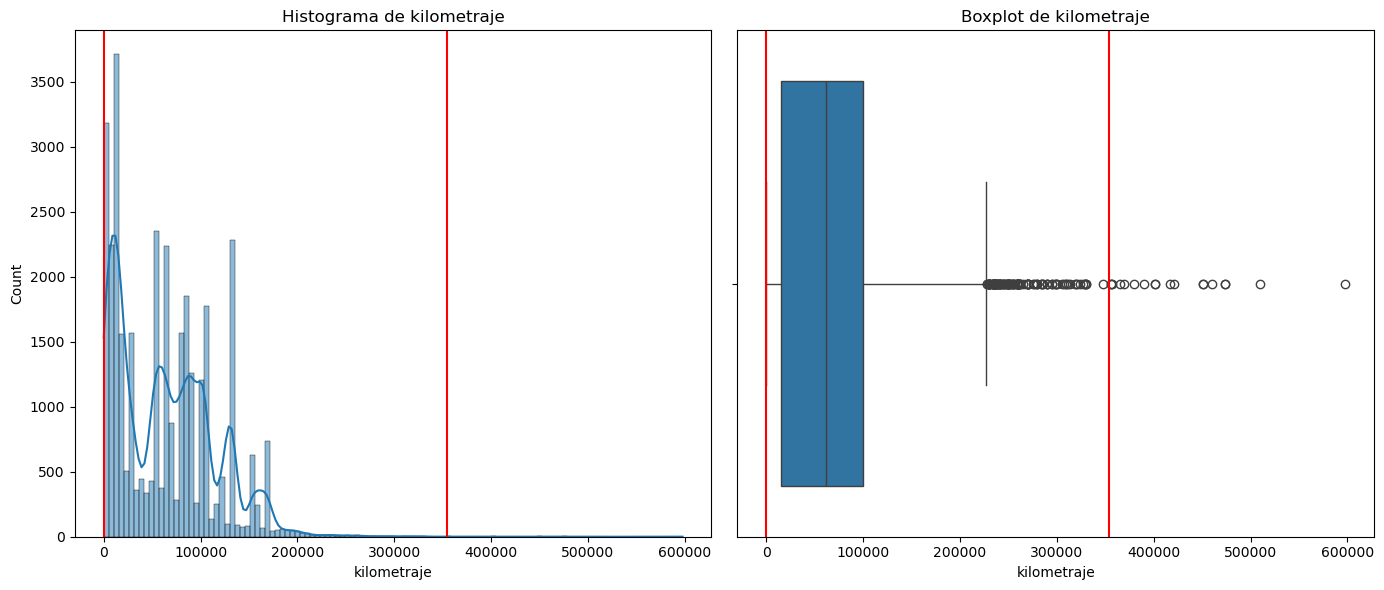

In [72]:
prueba_outliers_tukey("kilometraje", 'derecho', 3)

0.0 48.0
Se mantienen el 99.13% de los datos en la columna garantia después de eliminar los outliers.


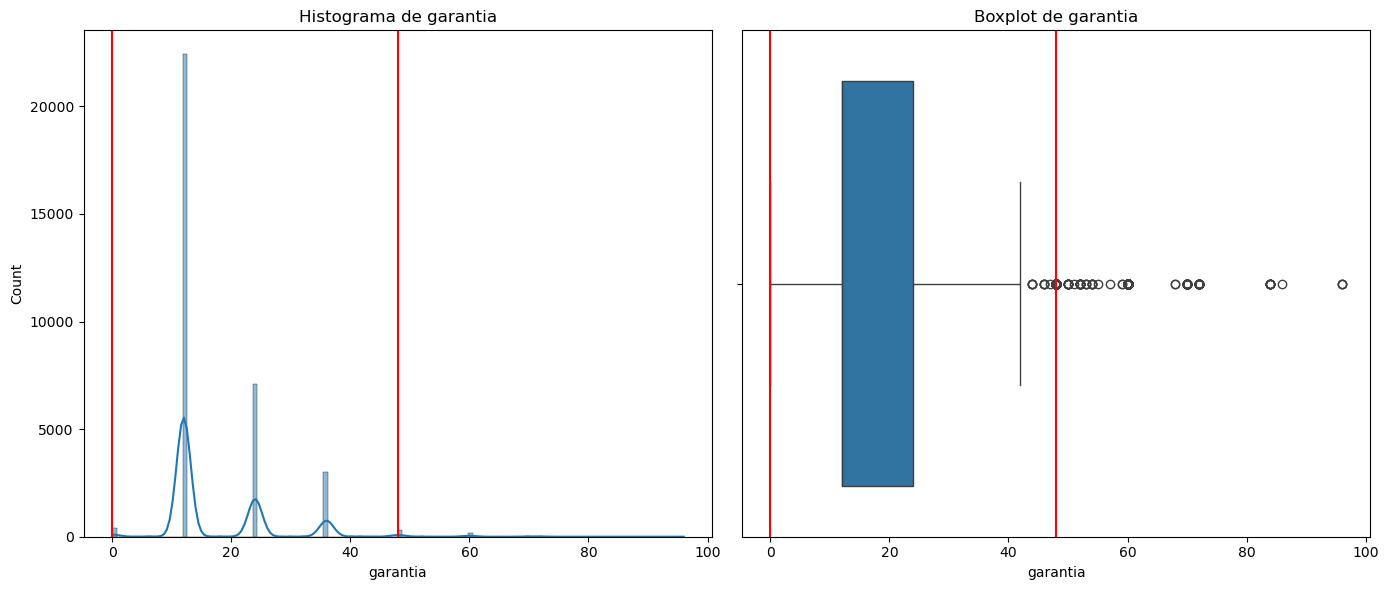

In [80]:
prueba_outliers_tukey("garantia", 'derecho', 2)

Se mantienen el 99.54% de los datos en la columna precio_contado después de eliminar los outliers.


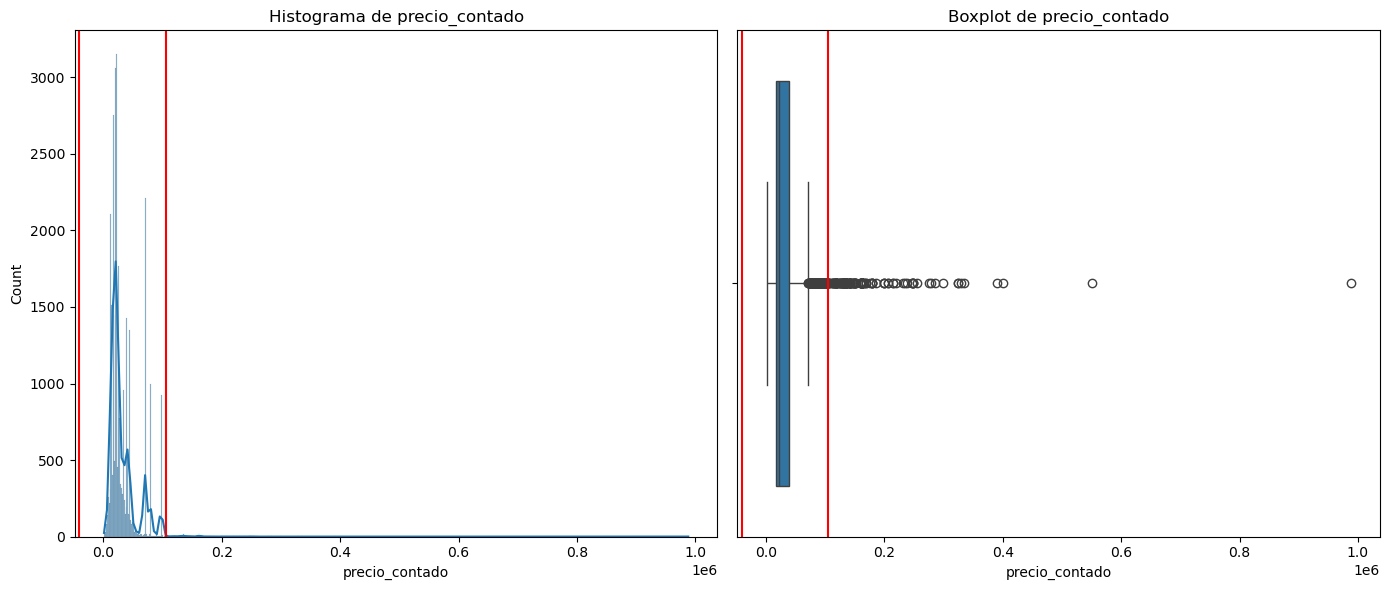

In [86]:
prueba_outliers_z("precio_contado")

Se mantienen el 99.21% de los datos en la columna precio_nuevo después de eliminar los outliers.


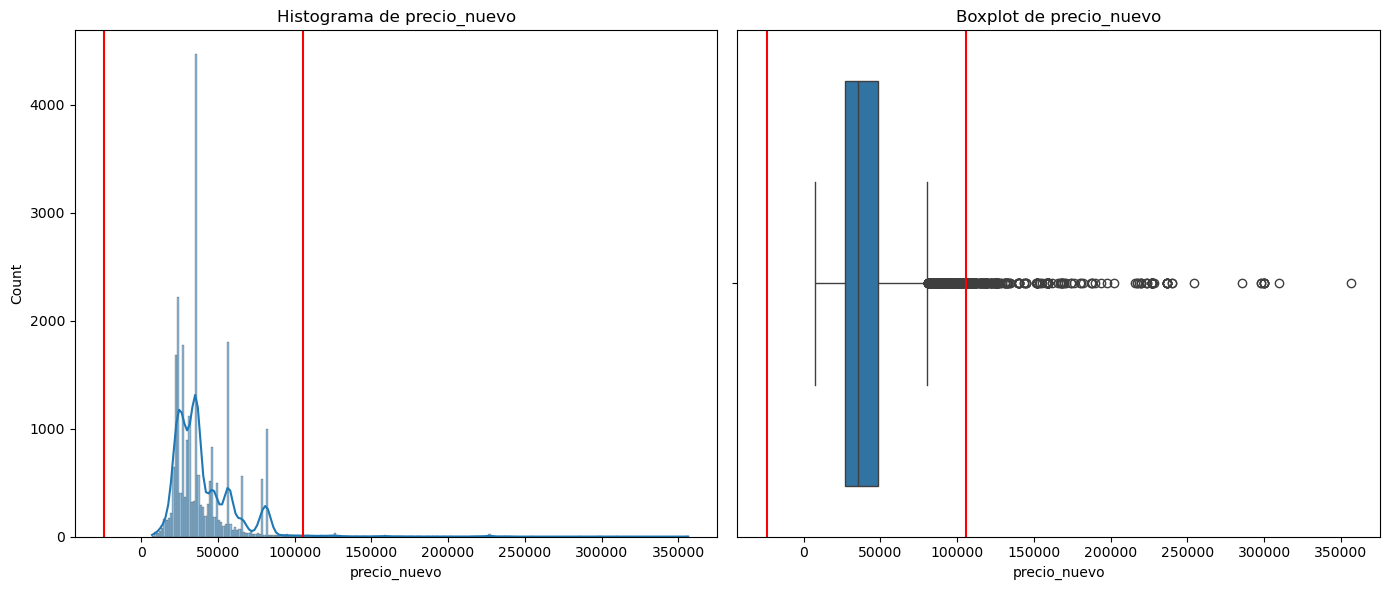

In [88]:
prueba_outliers_z("precio_nuevo")

Se mantienen el 99.33% de los datos en la columna capacidad_maletero después de eliminar los outliers.


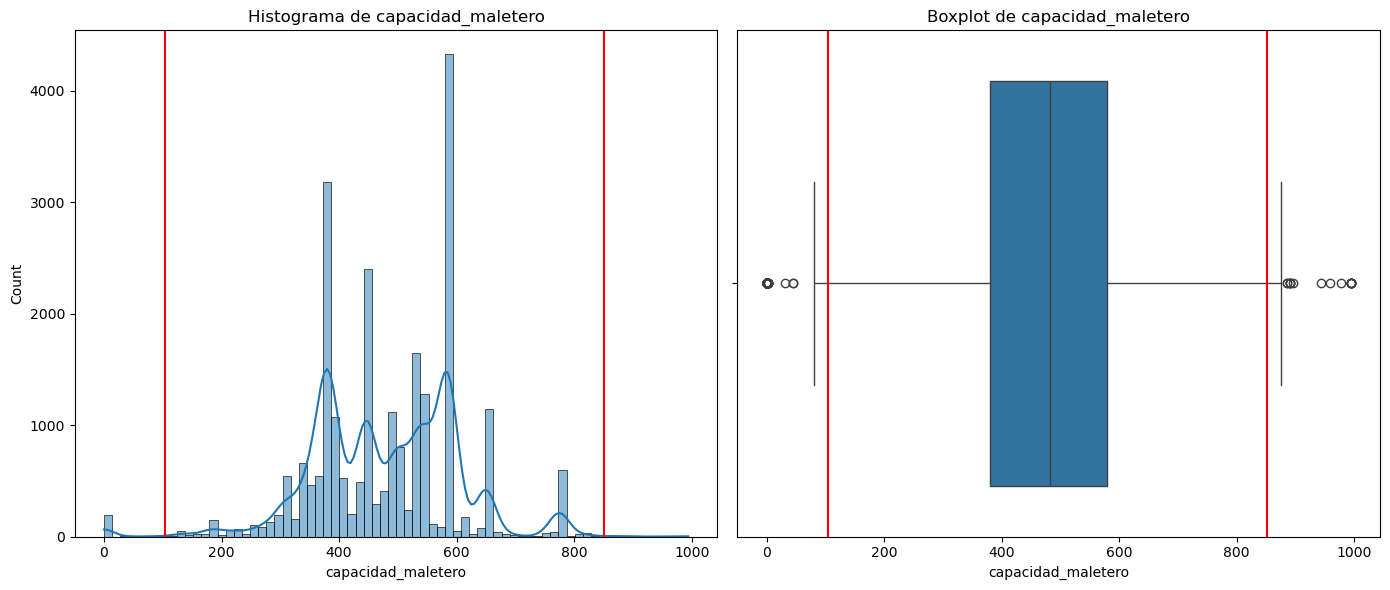

In [94]:
prueba_outliers_z("capacidad_maletero")

Se mantienen el 99.77% de los datos en la columna batalla después de eliminar los outliers.


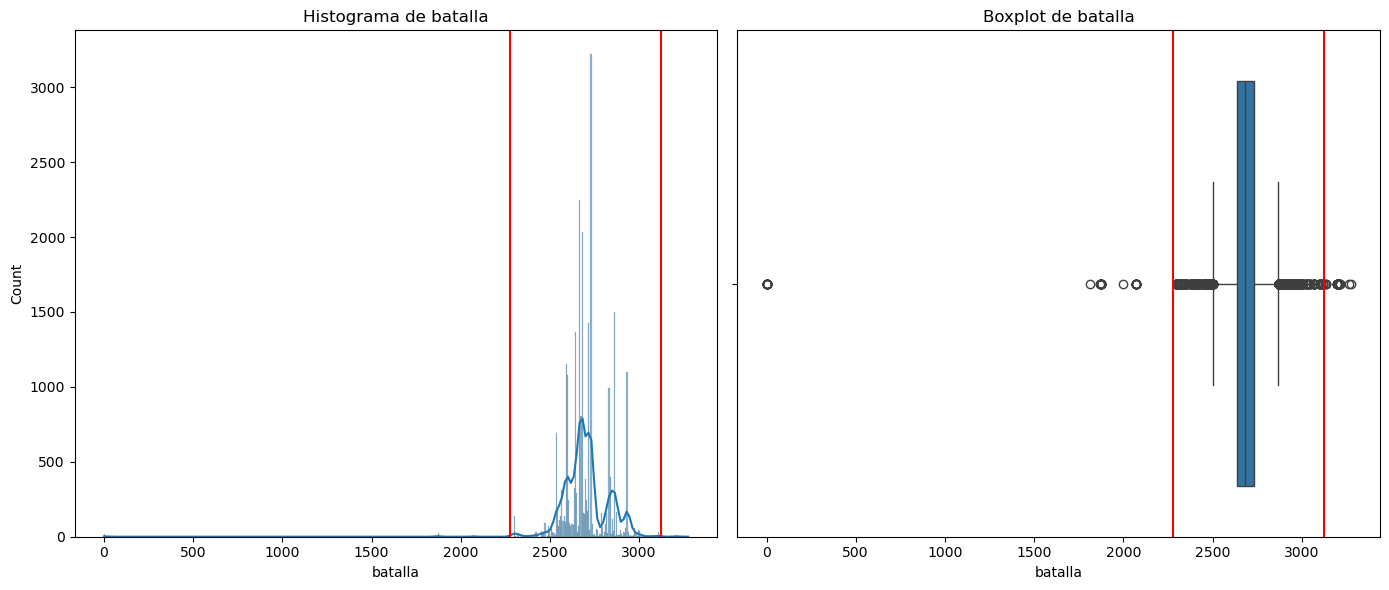

In [242]:
prueba_outliers_z("batalla")

0.0 12.75
Se mantienen el 99.93% de los datos en la columna consumo_medio después de eliminar los outliers.


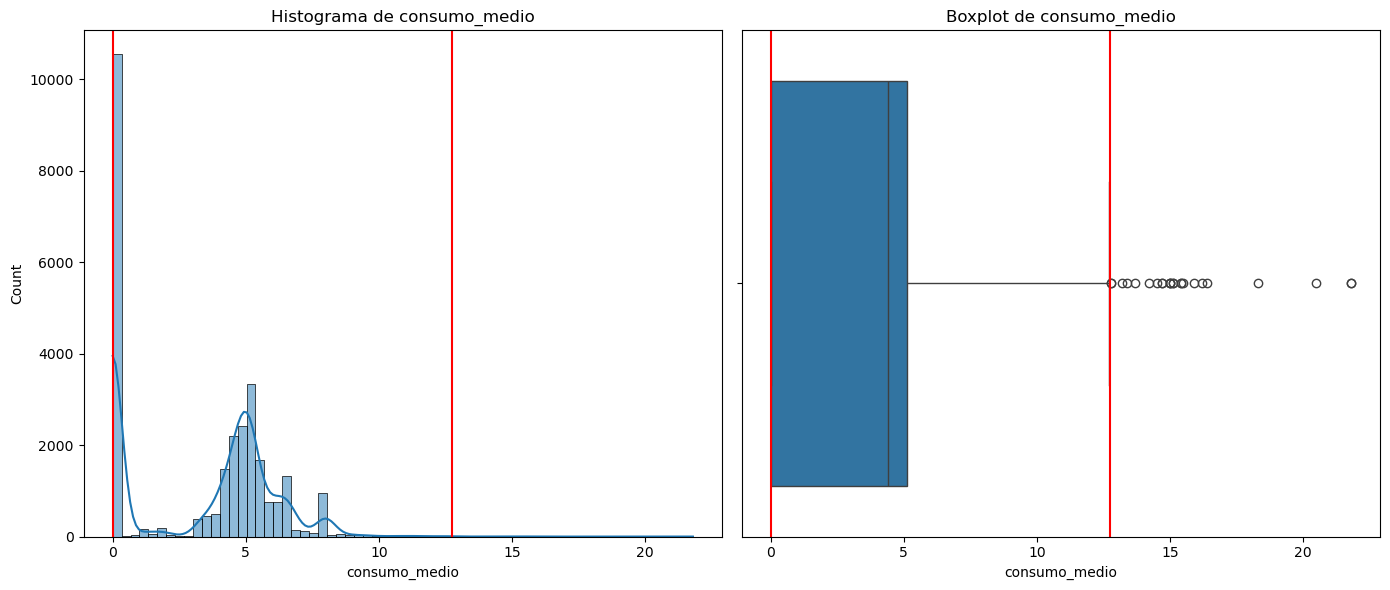

In [122]:
prueba_outliers_tukey("consumo_medio", 'derecho')

0.0 16.25
Se mantienen el 99.84% de los datos en la columna consumo_urbano después de eliminar los outliers.


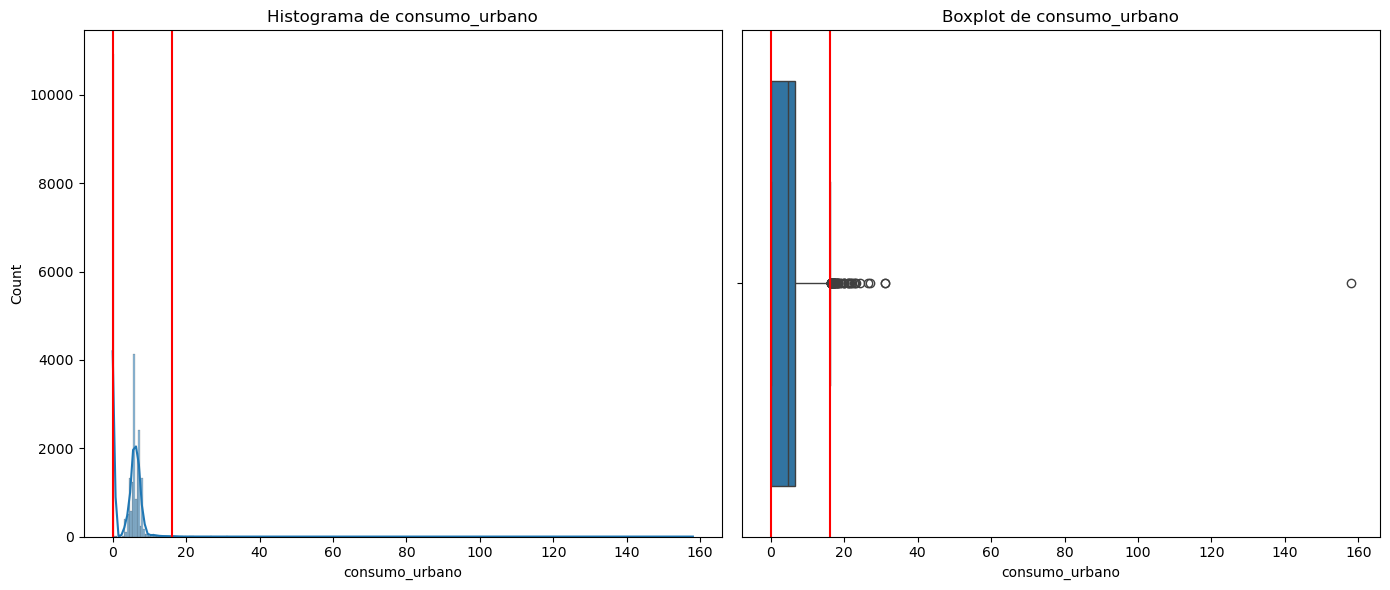

In [128]:
prueba_outliers_tukey("consumo_urbano", 'derecho')

1.0 3.6435000000000004
Se mantienen el 99.57% de los datos en la columna cilindrada después de eliminar los outliers.


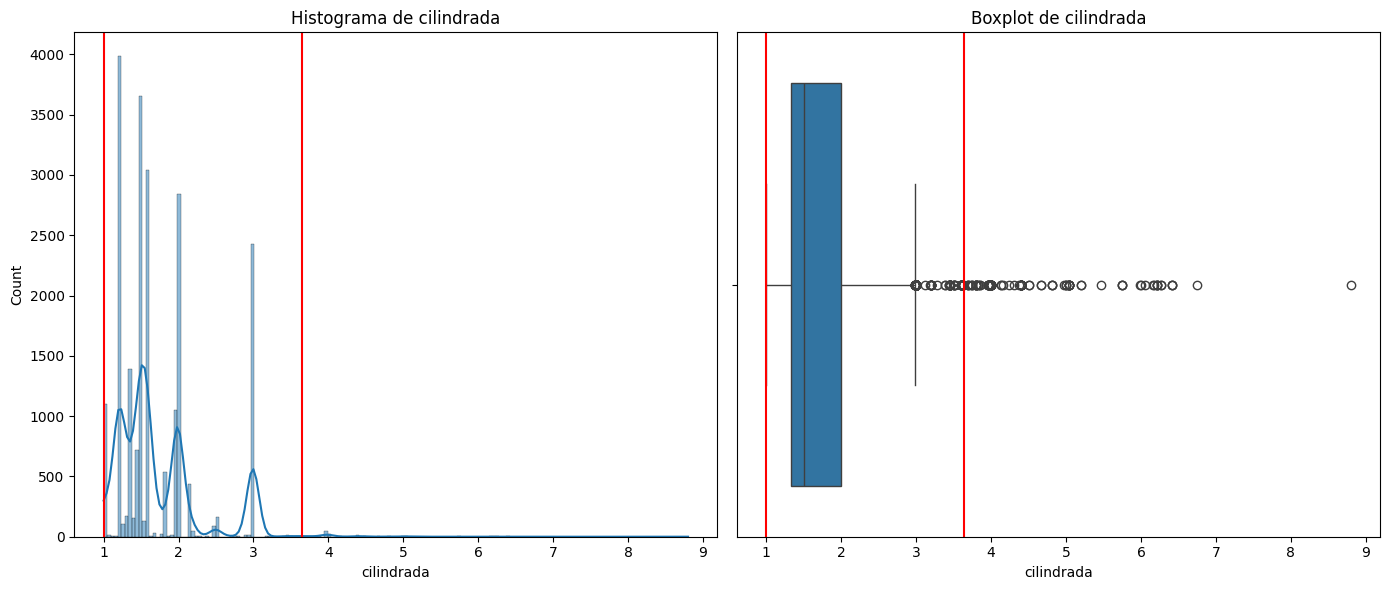

In [86]:
prueba_outliers("cilindrada", 'derecho', k=2.5)

33.0 322.0
Se mantienen el 99.35% de los datos en la columna potencia_kw después de eliminar los outliers.


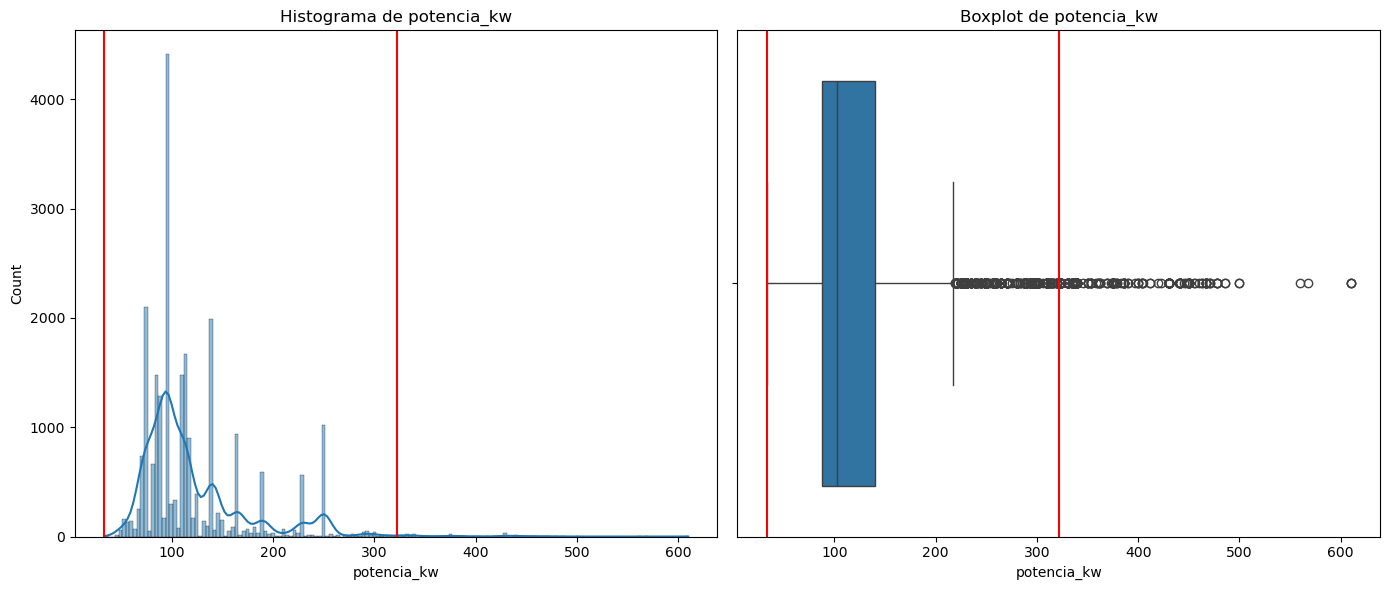

In [254]:
prueba_outliers_tukey("potencia_kw", 'derecho', 3.5)

45.0 448.5
Se mantienen el 99.31% de los datos en la columna potencia_cv después de eliminar los outliers.


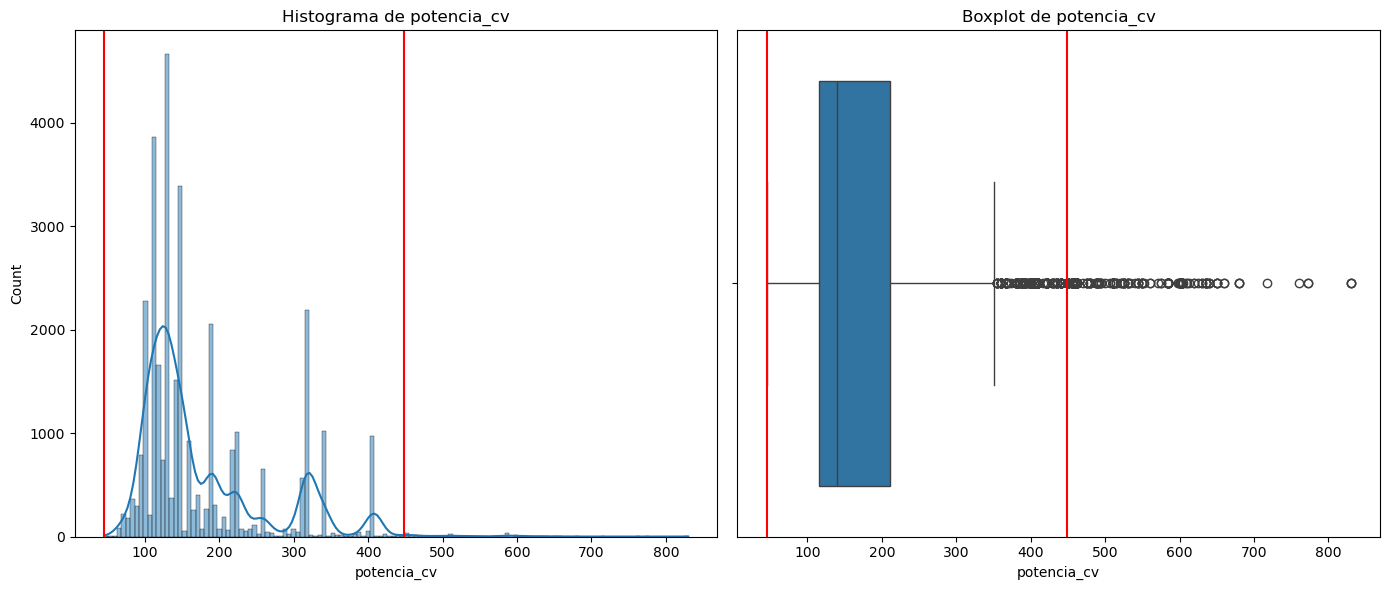

In [108]:
prueba_outliers_tukey("potencia_cv", 'derecho', 2.5)

Se mantienen el 99.66% de los datos en la columna co2 después de eliminar los outliers.


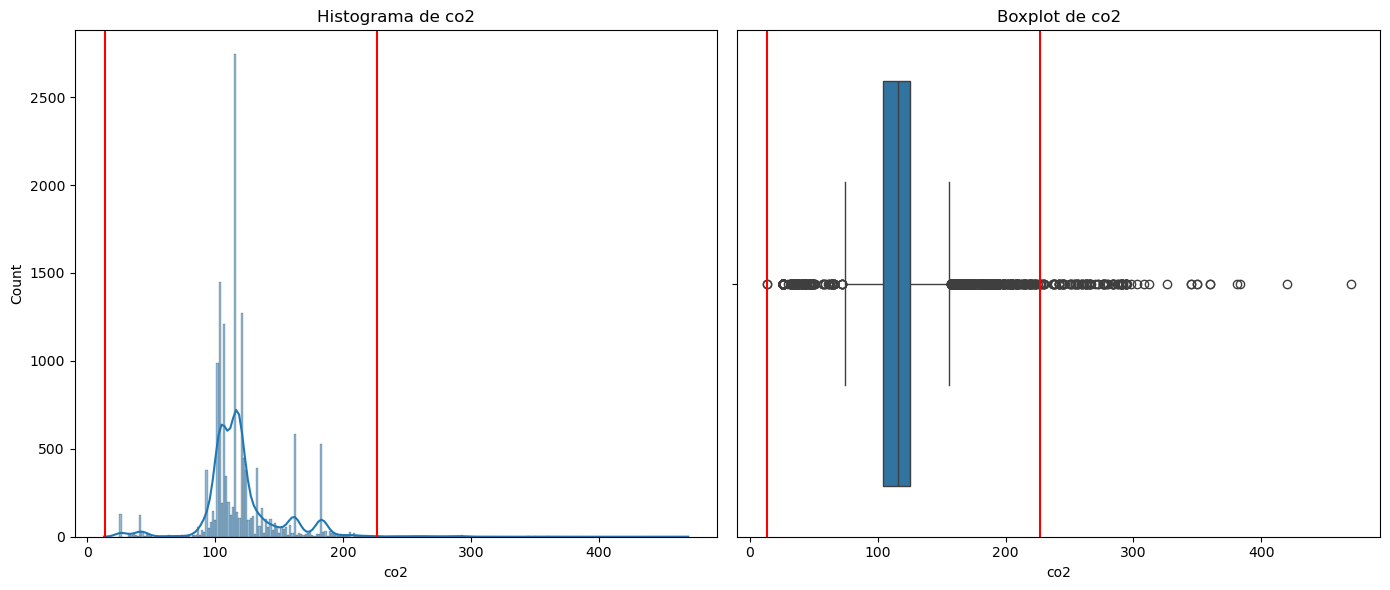

In [114]:
prueba_outliers_z("co2", 3.5)

In [256]:
df_sin_outliers = outliers_tukey(df_sin_outliers,'kilometraje', 'derecho', 3)
df_sin_outliers = outliers_tukey(df_sin_outliers,'garantia', 'derecho', 2)
df_sin_outliers = outliers_tukey(df_sin_outliers,'consumo_medio', 'derecho')
df_sin_outliers = outliers_tukey(df_sin_outliers,'consumo_urbano','derecho')
df_sin_outliers = outliers_tukey(df_sin_outliers,"potencia_kw", 'derecho', 3.5)
df_sin_outliers = outliers_tukey(df_sin_outliers,"potencia_cv", 'derecho', 2.5)

Se mantienen el 99.95% de los datos en la columna kilometraje después de eliminar los outliers.
Se mantienen el 99.08% de los datos en la columna garantia después de eliminar los outliers.
Se mantienen el 99.01% de los datos en la columna consumo_medio después de eliminar los outliers.
Se mantienen el 98.91% de los datos en la columna consumo_urbano después de eliminar los outliers.
Se mantienen el 98.38% de los datos en la columna potencia_kw después de eliminar los outliers.
Se mantienen el 98.27% de los datos en la columna potencia_cv después de eliminar los outliers.


In [258]:
df_sin_outliers = outliers_z_score(df_sin_outliers,'precio_contado',3)
df_sin_outliers = outliers_z_score(df_sin_outliers,'precio_nuevo',3)
df_sin_outliers = outliers_z_score(df_sin_outliers,'batalla',3)
df_sin_outliers = outliers_z_score(df_sin_outliers,'capacidad_maletero',3)

Se mantienen el 98.15% de los datos en la columna precio_contado después de eliminar los outliers.
Se mantienen el 97.74% de los datos en la columna precio_nuevo después de eliminar los outliers.
Se mantienen el 97.01% de los datos en la columna batalla después de eliminar los outliers.
Se mantienen el 96.48% de los datos en la columna capacidad_maletero después de eliminar los outliers.


In [261]:
df_sin_outliers.to_csv('../bin/data_preprocess.csv', index=False)

In [265]:
df_sin_outliers.shape

(32862, 36)

In [267]:
df.shape

(34062, 36)

## MAPA COROPLÉTICO ##

In [99]:
df.columns

Index(['id_provincia', 'kilometraje', 'id_concesionario',
       'id_distintivo_ambiental', 'garantia', 'precio_contado', 'precio_nuevo',
       'largo', 'ancho', 'alto', 'capacidad_maletero', 'id_carroceria',
       'num_plazas', 'batalla', 'peso', 'num_puertas', 'consumo_medio',
       'consumo_carretera', 'consumo_urbano', 'deposito', 'combustible',
       'cilindrada', 'num_marchas', 'potencia_kw', 'potencia_cv', 'par',
       'velocidad_max', 'aceleracion', 'mes_matriculacion',
       'ano_matriculacion', 'co2', 'num_cilindros', 'id_sobrealimentacion',
       'id_marca', 'id_modelo', 'id_tipo_cambio'],
      dtype='object')

In [100]:
conversion_inversa = {v: k for k, v in conversion_provincias.items()}

#Más adelante hay que droppear esta columna. Es la conversión inversa a nombres de provincia
df['nombre_provincia'] = df['id_provincia'].map(conversion_inversa)

datos_agrupados = df.groupby('id_provincia').agg(
    cantidad_coches=('id_provincia', 'size'),
    media_precio=('precio_contado', 'mean')
).reset_index()

datos_agrupados['nombre_provincia'] = datos_agrupados['id_provincia'].map(conversion_inversa)

cantidad_coches_dict = dict(zip(datos_agrupados['nombre_provincia'], datos_agrupados['cantidad_coches']))
media_precio_dict = dict(zip(datos_agrupados['nombre_provincia'], datos_agrupados['media_precio']))

In [101]:
coordenadas = {
    "Álava": (42.8467, -2.6716),
    "Albacete": (38.9943, -1.8564),
    "Alicante": (38.3452, -0.4810),
    "Almería": (36.8340, -2.4637),
    "Asturias": (43.3619, -5.8494),
    "Ávila": (40.6565, -4.7003),
    "Badajoz": (38.8794, -6.9706),
    "Islas Baleares": (39.5696, 2.6502),
    "Barcelona": (41.3851, 2.1734),
    "Burgos": (42.3439, -3.6969),
    "Cáceres": (39.4763, -6.3722),
    "Cádiz": (36.5271, -6.2886),
    "Cantabria": (43.4623, -3.8099),
    "Castellón": (39.9864, -0.0513),
    "Ciudad Real": (38.9848, -3.9270),
    "Córdoba": (37.8882, -4.7794),
    "La Coruña": (43.3623, -8.4115),
    "Cuenca": (40.0704, -2.1374),
    "Girona": (41.9794, 2.8214),
    "Granada": (37.1773, -3.5986),
    "Guadalajara": (40.6333, -3.1669),
    "Guipúzcoa": (43.3183, -1.9812),
    "Huelva": (37.2614, -6.9447),
    "Huesca": (42.1401, -0.4089),
    "Jaén": (37.7796, -3.7849),
    "León": (42.5987, -5.5671),
    "Lleida": (41.6176, 0.6200),
    "La Rioja": (42.4627, -2.4449),
    "Lugo": (43.0120, -7.5559),
    "Madrid": (40.4168, -3.7038),
    "Málaga": (36.7213, -4.4214),
    "Murcia": (37.9922, -1.1307),
    "Navarra": (42.8125, -1.6458),
    "Orense": (42.3358, -7.8639),
    "Palencia": (42.0095, -4.5270),
    "Las Palmas": (28.1235, -15.4363),
    "Pontevedra": (42.4310, -8.6444),
    "Salamanca": (40.9701, -5.6635),
    "Santa Cruz de Tenerife": (28.4636, -16.2518),
    "Segovia": (40.9429, -4.1088),
    "Sevilla": (37.3891, -5.9845),
    "Soria": (41.7636, -2.4645),
    "Tarragona": (41.1189, 1.2445),
    "Teruel": (40.3440, -1.1069),
    "Toledo": (39.8628, -4.0273),
    "Valencia": (39.4699, -0.3763),
    "Valladolid": (41.6523, -4.7245),
    "Vizcaya": (43.2630, -2.9350),
    "Zamora": (41.5033, -5.7446),
    "Zaragoza": (41.6488, -0.8891),
    "Ceuta": (35.8894, -5.3198),
    "Melilla": (35.2923, -2.9381)}

In [102]:
datos_agrupados.head()

id_provincia  cantidad_coches  media_precio nombre_provincia
0             1            15951  33078.486045           Madrid
1             2              179  27737.142857          Sevilla
2             3               50  35664.660000          Córdoba
3             4              406  32845.733503         Valencia
4             5              701  27205.856725           Málaga

In [103]:
lista_provincias = [provincia for provincia in datos_agrupados['nombre_provincia'].unique()]

In [104]:
m_cantidad_coches = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

for i, row in datos_agrupados.iterrows():
    provincia = row['nombre_provincia']
    cantidad = row['cantidad_coches']
    
    if provincia in coordenadas:
        folium.Circle(
            location=coordenadas[provincia],
            radius=cantidad * 10,
            color='blue',
            fill=True,
            fill_color='YlGnBu',
            fill_opacity=0.7,
            popup=f"{provincia}: {cantidad} coches"
        ).add_to(m_cantidad_coches)

m_cantidad_coches

In [105]:
m_media_precio = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

for i, row in datos_agrupados.iterrows():
    provincia = row['nombre_provincia']
    media_precio = row['media_precio']
    
    if provincia in coordenadas:
        folium.Circle(
            location=coordenadas[provincia],
            radius=media_precio / 10,
            color='red',
            fill=True,
            fill_color='YlOrRd',
            fill_opacity=0.7,
            popup=f"{provincia}: Precio medio {media_precio:.2f}€"
        ).add_to(m_media_precio)

m_media_precio.save("media_precio_provincias.html")
m_media_precio

In [107]:
mapa_cantidad_coches = folium.Map(location=[40.4168, -3.7038], zoom_start=6)

# Mapa coroplético para la cantidad de coches usando el diccionario
Choropleth(
    geo_data='../bin/Límites de las Provincias de España.geojson',
    name="choropleth",
    data=cantidad_coches_dict,
    key_on="feature.properties.nombre_provincia",
    fill_color="YlGn",
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name="Cantidad de coches por provincia"
).add_to(mapa_cantidad_coches)

mapa_cantidad_coches

AttributeError: 'NoneType' object has no attribute 'get'